 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

## Assumptions and limitations

1. Limitation: Only dates that overlap between portfolios will be compared
2. Assumption: There are no significant anomalous price impacting events during the time window such as share split, trading halt
3. Assumption: S&P TSX 60 is representative of the market as a whole, acting as an index
4. Assumption: Each portfolio (new shares, Whale, and Algos) will have an even spread of weights across all sub-portfolios

## 0. Import Required Libraries

In [1]:
# Initial imports
import pandas as pd # daataframe manipulation
import numpy as np # calc and numeric manipulatino
import datetime as dt # date and time 
from pathlib import Path # setting the path for file manipulation
import datetime
import seaborn as sns # advanced plotting/charting library
import matplotlib as plt
pd.options.display.float_format = '{:.6f}'.format # float format to 6 decimal places

# I. Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## A. Whale Returns

Read the Whale Portfolio daily returns and clean the data.

### 1. import whale csv and set index to date

In [2]:
df_wr = pd.read_csv('Resources/whale_returns.csv', index_col="Date")

### 2. Inspect imported data

In [3]:
# look at colums and value head
df_wr.head(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        nan                 nan   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          nan                     nan  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213

In [4]:
# look at last few values
df_wr.tail(3)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833

In [5]:
# check dimensions of df
df_wr.shape

(1060, 4)

In [6]:
# get index datatype - for later merging
df_wr.index.dtype

dtype('O')

In [7]:
# get datatypes of all values
df_wr.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

### 3. Count and drop any null values

In [8]:
# Count nulls
df_wr.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls 
df_wr.dropna(inplace=True)

In [10]:
# Count nulls -again to ensure they're removed
df_wr.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
df_wr.count() #double check all values are equal in length

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

### 4. Sort the index to ensure the correct date order for calculations

In [12]:
df_wr.sort_index(inplace=True)

### 5. Rename columns - shorten and make consistent with other tables

In [13]:
# change columns to be consistent and informative
df_wr.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [14]:
df_wr.columns = ['Whale_Soros_Fund_Daily_Returns', 'Whale_Paulson_Daily_Returns',
       'Whale_Tiger_Daily_Returns', 'Whale_Berekshire_Daily_Returns']

### 6. Create copy dataframe with new column for cumulative returns

In [15]:
# copy the dataframe to store cumprod in a new view
df_wr_cumulative = df_wr.copy()

In [16]:
# create a new column in new df for each cumulative daily return using the cumprod function
df_wr_cumulative['Whale_Soros_Fund_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Soros_Fund_Daily_Returns']).cumprod()

In [17]:
df_wr_cumulative['Whale_Paulson_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Paulson_Daily_Returns']).cumprod()

In [18]:
df_wr_cumulative['Whale_Tiger_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Tiger_Daily_Returns']).cumprod()

In [19]:
df_wr_cumulative['Whale_Berekshire_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Berekshire_Daily_Returns']).cumprod()

In [20]:
df_wr_cumulative.head() # check result is consistent against original column ie adds up

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   
2015-03-06                       -0.007905                    -0.003574   
2015-03-09                        0.000582                     0.004225   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   
2015-03-06                  -0.008481                       -0.013098   
2015-03-09                   0.005843                       -0.001652   

            Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2015-03-03                           0.998734                        0.995019   
2015-03-04                           1.000962                        0.998245   
2015-03-05                           1.004981                        1.002314   
2015-03-06                           0.997037                        0.998731   
2015-03-09                           0.997617                        1.002951   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  
Date                                                                         
2015-03-03                      0.999504                           0.993431  
2015-03-04                      0.996972                           0.997617  
2015-03-05                      0.999319                           1.004327  
2015-03-06                      0.990844                           0.991172  
2015-03-09                      0.996633                           0.989534

In [21]:
# drop returns columns from cumulative df

In [22]:
df_wr_cumulative.columns

Index(['Whale_Soros_Fund_Daily_Returns', 'Whale_Paulson_Daily_Returns',
       'Whale_Tiger_Daily_Returns', 'Whale_Berekshire_Daily_Returns',
       'Whale_Soros_Fund_Daily_CumReturns', 'Whale_Paulson_Daily_CumReturns',
       'Whale_Tiger_Daily_CumReturns', 'Whale_Berekshire_Daily_CumReturns'],
      dtype='object')

In [23]:
df_wr_cumulative = df_wr_cumulative[['Whale_Soros_Fund_Daily_CumReturns', 'Whale_Paulson_Daily_CumReturns','Whale_Tiger_Daily_CumReturns', 'Whale_Berekshire_Daily_CumReturns']]

In [24]:
df_wr_cumulative.head()

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2015-03-03                           0.998734                        0.995019   
2015-03-04                           1.000962                        0.998245   
2015-03-05                           1.004981                        1.002314   
2015-03-06                           0.997037                        0.998731   
2015-03-09                           0.997617                        1.002951   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  
Date                                                                         
2015-03-03                      0.999504                           0.993431  
2015-03-04                      0.996972                           0.997617  
2015-03-05                      0.999319                           1.004327  
2015-03-06                      0.990844                           0.991172  
2015-03-09                      0.996633                           0.989534

### 7. Look at high level stats & plot for whale portfolios

In [25]:
df_wr.describe(include='all') # basic stats for daily whale returns

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
count                     1059.000000                  1059.000000   
mean                         0.000179                    -0.000203   
std                          0.007842                     0.006977   
min                         -0.032711                    -0.032099   
25%                         -0.003594                    -0.003961   
50%                          0.000467                     0.000000   
75%                          0.004292                     0.003567   
max                          0.042977                     0.029338   

       Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  
count                1059.000000                     1059.000000  
mean                   -0.000081                        0.000501  
std                     0.010824                        0.012831  
min                    -0.139820                       -0.066505  
25%                    -0.004746                       -0.005515  
50%                     0.000232                        0.000617  
75%                     0.005176                        0.007516  
max                     0.080705                        0.061341

In [26]:
df_wr_cumulative.describe(include='all') # basic stats for daily cumulative whale returns

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
count                        1059.000000                     1059.000000   
mean                            1.049883                        0.876058   
std                             0.073730                        0.088385   
min                             0.881701                        0.691364   
25%                             0.989084                        0.792238   
50%                             1.040493                        0.864336   
75%                             1.119133                        0.949932   
max                             1.204573                        1.050682   

       Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  
count                   1059.000000                        1059.000000  
mean                       1.146284                           1.159732  
std                        0.151043                           0.242778  
min                        0.822799                           0.776232  
25%                        1.016063                           0.935323  
50%                        1.138139                           1.057278  
75%                        1.284809                           1.364337  
max                        1.428464                           1.638119

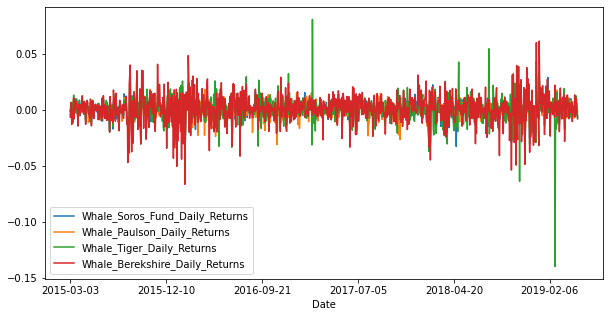

In [27]:
# plot daily returns - whales
df_wr.plot(figsize=(10,5))

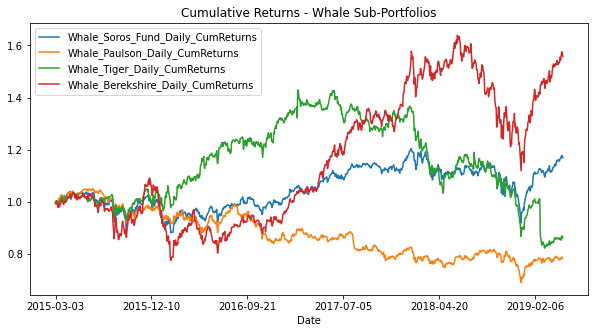

In [28]:
# Plot cumulative returns - individual subportfolios
df_wr_cumulative.plot(figsize=(10,5), title='Cumulative Returns - Whale Sub-Portfolios')

### 8. Calculate the overall portfolio returns, given equal weight to sub-portfolios

In [29]:
# Set weights
weights_wr = [0.25, 0.25, 0.25, 0.25] # equal weights across all 4 portfolios

In [30]:
# use the dot function to cross multiple the daily rturns of individual stocks against the weights
portfolio_df_wr = df_wr.dot(weights_wr)

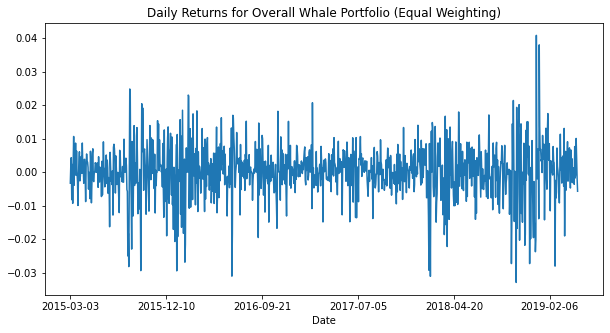

In [31]:
portfolio_df_wr.plot(figsize=(10,5), title='Daily Returns for Overall Whale Portfolio (Equal Weighting)')

### 9. Calculate the overall portfolio cumultative returns, given equal weight to sub-portfolios

In [32]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
wr_cumulative_returns = (1 + portfolio_df_wr).cumprod() - 1


In [33]:
wr_cumulative_returns.head()

Date
2015-03-03   -0.003328
2015-03-04   -0.001546
2015-03-05    0.002741
2015-03-06   -0.005547
2015-03-09   -0.003310
dtype: float64

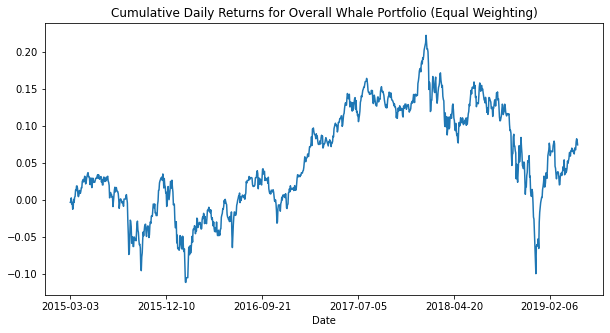

In [34]:
wr_cumulative_returns.plot(figsize=(10,5), title='Cumulative Daily Returns for Overall Whale Portfolio (Equal Weighting)')

### 10. Initial data overview for Whales 

<li> Lack of gaps in chart indicate there are no data gaps, and the lack of extreme fluctuations indicates the data is consistent. The data looks consistent and there are no obvious data errors identified. 
<li> Initial high level observations of standalone daily returns data for whale portfolio:  At initial glance, the mean daily return indicates that Berkshire portfolio performed best (mean daily returns of 0.000501, mean cumulative daily returns 1.159732), while Paulson worst (-0.000203). The standard deviation indicates highest risk for Berkshire (0.012831 STD), while lowest risk/volatility is Paulson (std 0.006977)
<li> By looking at the cumulative chart, it is evident that all portfolios were vulnerable to a loss at the same time around 2019-02-16, but that Berkshir was able to increas the most over time and climb the steepest after the downturn.
<li> A more thorough portfolio comparison analysis will be done in the following analysis section, so no conclusions are drawn yet. 

## B. Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

### 1. import algo csv and set index to date

In [35]:
# Reading algorithmic returns
df_ar = pd.read_csv('Resources/algo_returns.csv', index_col='Date')

### 2. Inspect resulting dataframe and contained data

In [36]:
# look at colums and value first 3 rows
df_ar.head(3)

Algo 1  Algo 2
Date                       
2014-05-28 0.001745     nan
2014-05-29 0.003978     nan
2014-05-30 0.004464     nan

In [37]:
# look at colums and value last 3 rows
df_ar.tail(3)

Algo 1    Algo 2
Date                          
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

In [38]:
# get dimensions of df
df_ar.shape

(1241, 2)

In [39]:
# get index datatype - for later merging
df_ar.index.dtype

dtype('O')

In [40]:
# get datatypes
df_ar.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

### 3. Count and remove null values

In [41]:
# Count nulls
df_ar.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [42]:
# Drop nulls
df_ar.dropna(inplace=True)

In [43]:
# Count nulls -again to ensure that nulls actually are removed
df_ar.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [44]:
df_ar.count()

Algo 1    1235
Algo 2    1235
dtype: int64

### 4. Sort index to ensure correct date order for calculations

In [45]:
df_ar.sort_index(inplace=True)

### 5. Rename columns to be consistent with future merge

In [46]:
df_ar.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [47]:
df_ar.columns = ['Algo1_Daily_Returns', 'Algo2_Daily_Returns']

### 6. Create new column in a copy df for cumulative returns per Algo daily return

In [48]:
# create a df copy to store cumulative data
df_ar_cumulative = df_ar.copy() 

In [49]:
# use cumprod to get the daily cumulative returns for each of the algos 1 and 2
df_ar_cumulative['Algo1_Daily_CumReturns'] = (1 + df_ar_cumulative['Algo1_Daily_Returns']).cumprod()

In [50]:
df_ar_cumulative['Algo2_Daily_CumReturns'] = (1 + df_ar_cumulative['Algo2_Daily_Returns']).cumprod()

In [51]:
# check the result is consistent with the daily returns for first few columns
df_ar_cumulative.head(10)

Algo1_Daily_Returns  Algo2_Daily_Returns  Algo1_Daily_CumReturns  \
Date                                                                           
2014-06-05             0.004062             0.013285                1.004062   
2014-06-06             0.001857             0.008284                1.005927   
2014-06-09            -0.005012             0.005668                1.000885   
2014-06-10             0.004406            -0.000735                1.005295   
2014-06-11             0.004760            -0.003761                1.010081   
2014-06-12            -0.000028            -0.003841                1.010052   
2014-06-13             0.001917            -0.000814                1.011989   
2014-06-16             0.001084             0.001831                1.013086   
2014-06-17             0.000922             0.006870                1.014020   
2014-06-18            -0.006303             0.007228                1.007628   

            Algo2_Daily_CumReturns  
Date                                
2014-06-05                1.013285  
2014-06-06                1.021679  
2014-06-09                1.027470  
2014-06-10                1.026714  
2014-06-11                1.022852  
2014-06-12                1.018923  
2014-06-13                1.018094  
2014-06-16                1.019958  
2014-06-17                1.026964  
2014-06-18                1.034387

In [52]:
# drop columns that are not required

In [53]:
df_ar_cumulative.columns # get the columns

Index(['Algo1_Daily_Returns', 'Algo2_Daily_Returns', 'Algo1_Daily_CumReturns',
       'Algo2_Daily_CumReturns'],
      dtype='object')

In [54]:
df_ar_cumulative = df_ar_cumulative[['Algo1_Daily_CumReturns','Algo2_Daily_CumReturns']]

In [55]:
# check result - first few lines
df_ar_cumulative.head(10)

Algo1_Daily_CumReturns  Algo2_Daily_CumReturns
Date                                                      
2014-06-05                1.004062                1.013285
2014-06-06                1.005927                1.021679
2014-06-09                1.000885                1.027470
2014-06-10                1.005295                1.026714
2014-06-11                1.010081                1.022852
2014-06-12                1.010052                1.018923
2014-06-13                1.011989                1.018094
2014-06-16                1.013086                1.019958
2014-06-17                1.014020                1.026964
2014-06-18                1.007628                1.034387

### 7. Look at high level stats & plot for algo portfolios

In [56]:
df_ar.describe(include='all') # stats for daily returns

Algo1_Daily_Returns  Algo2_Daily_Returns
count          1235.000000          1235.000000
mean              0.000654             0.000341
std               0.007988             0.008466
min              -0.030951            -0.036937
25%              -0.003252            -0.003733
50%               0.000094             0.000581
75%               0.003901             0.005194
max               0.098246             0.083734

In [57]:
df_ar_cumulative.describe(include='all') # stats for daily cumulative returns

Algo1_Daily_CumReturns  Algo2_Daily_CumReturns
count             1235.000000             1235.000000
mean                 1.469760                1.228900
std                  0.294720                0.159139
min                  0.962939                0.912747
25%                  1.127517                1.097729
50%                  1.545455                1.181145
75%                  1.611602                1.370561
max                  2.195434                1.526028

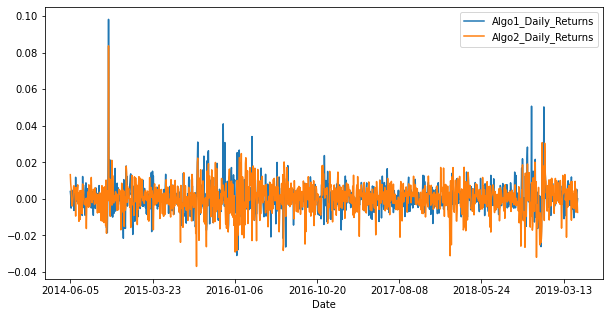

In [58]:
# plot daily returns  - algos
df_ar.plot(figsize=(10,5))

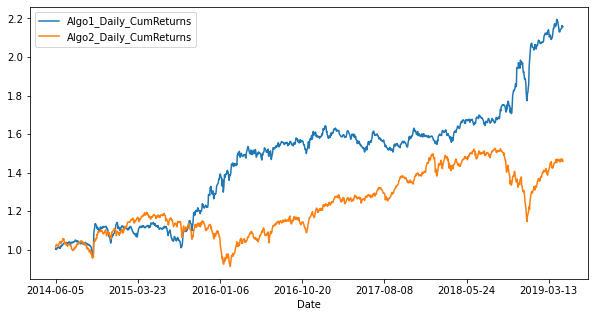

In [59]:
# plot daily cumulative returns  - algos
df_ar_cumulative.plot(figsize=(10,5))

### 8. Calculate the overall portfolio returns, given equal weight to sub-portfolios

In [60]:
# Set weights
weights_ar = [0.5, 0.5] # equal weights across 2 algo sub-portfolios


In [61]:
# use the dot function to cross multiple the daily rturns of individual stocks against the weights
portfolio_df_ar = df_ar.dot(weights_ar)

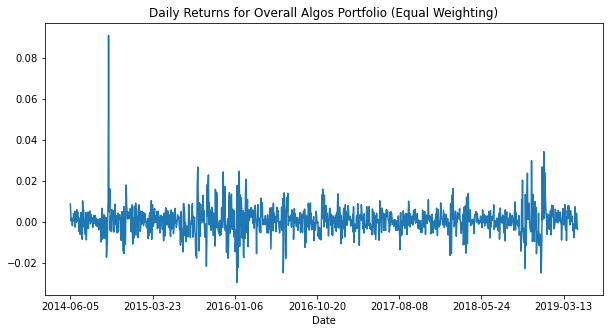

In [62]:
portfolio_df_ar.plot(figsize=(10,5), title='Daily Returns for Overall Algos Portfolio (Equal Weighting)')

### 9. Calculate the overall portfolio cumultative returns, given equal weight to sub-portfolios

In [63]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
ar_cumulative_returns = (1 + portfolio_df_ar).cumprod() - 1


In [64]:
ar_cumulative_returns.head()

Date
2014-06-05   0.008674
2014-06-06   0.013788
2014-06-09   0.014121
2014-06-10   0.015982
2014-06-11   0.016489
dtype: float64

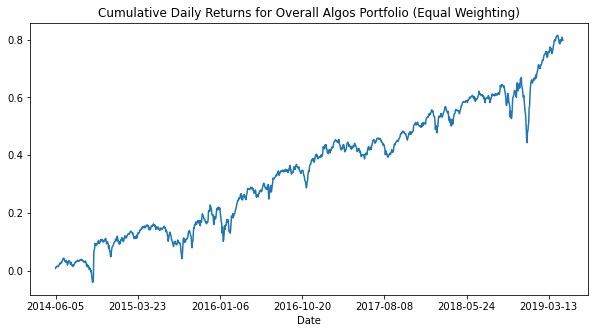

In [65]:
ar_cumulative_returns.plot(figsize=(10,5), title='Cumulative Daily Returns for Overall Algos Portfolio (Equal Weighting)')

### 10. Quick data overview - Algos

Initial observations of standalone daily returns data for Algo 1 vs Algo 2: 

<li> mean daily return indicates that Algo 1 (mean daily return 0.000654) performs slightly better than Algo 2 (mean daily return 0.000341), which is alo evident in the cumulative daily returns plot. 
    
<li> When looking at just daily returns, Algo 2 is more risky, but when looking at cumulative returns, Algo 1 is more risky (ie higher standard deviation). 
    
<li> Lack of gaps in chart indicate there are no data gaps, and the lack of extreme fluctuations indicates the data is consistent

<li> Cumulative portfio level returns appear steeper compared with Whales at initial glance

## C. S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 
Note: this contains daily closing and not returns - needs to be converted

### 1. Import S&P csv daily closing price (not returns)

In [66]:
# Reading S&P TSX 60 Closing Prices
df_sr = pd.read_csv('Resources/sp_tsx_history.csv')

### 2. Inspect columns of dataframe

In [67]:
# look at colums and value head
df_sr.head(3)

Date       Close
0  1-Oct-2012  $12,370.19
1  2-Oct-2012  $12,391.23
2  3-Oct-2012  $12,359.47

In [68]:
# look at tail values
df_sr.tail(3)

Date       Close
1815  24-Dec-2019  $17,180.15
1816  27-Dec-2019  $17,168.21
1817  30-Dec-2019  $17,098.56

#### Note from dataframe inspection: 
#### 1. date column was not immediated converted because it is in
#### a different format to the other csv files and 
#### needs to bee converted to consistent format first
#### 2. Close cannot be explicitly converted to float as it has
#### dollar and commas. 
#### 3. A new column for returns will need to be created from 
#### return calculations. 

In [69]:
# check dimension of df
df_sr.shape

(1818, 2)

In [70]:
# Check Data Types
df_sr.dtypes

Date     object
Close    object
dtype: object

### 3. Convert the date into a consistent format with other tables

In [71]:
df_sr['Date']= pd.to_datetime(df_sr['Date']).dt.strftime('%Y-%m-%d')


### 4. Convert the date data to index and check format and data type

In [72]:
# set date as index
df_sr.set_index('Date', inplace=True)

In [73]:
df_sr.head(2)

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23

In [74]:
df_sr.index.dtype

dtype('O')

### 5. Check for null values

In [75]:
# Count nulls - none observed
df_ar.isna().sum()

Algo1_Daily_Returns    0
Algo2_Daily_Returns    0
dtype: int64

### 6. Convert daily closing price to float (from string)

In [76]:
# Change the Closing column to b float type
df_sr['Close']= df_sr['Close'].str.replace('$','')
df_sr['Close']= df_sr['Close'].str.replace(',','')
df_sr['Close']= df_sr['Close'].astype(float)

In [77]:
# Check Data Types
df_sr.dtypes

Close    float64
dtype: object

In [78]:
# test 
df_sr.iloc[0]

Close   12370.190000
Name: 2012-10-01, dtype: float64

In [79]:
# check null values
df_sr.isna().sum()

Close    0
dtype: int64

In [80]:
df_sr.count()

Close    1818
dtype: int64

### 7. Sort the index for calculations of returns

In [81]:
# sort_index 
df_sr.sort_index(inplace=True)

In [82]:
df_sr.head(2)

Close
Date                   
2012-10-01 12370.190000
2012-10-02 12391.230000

### 8. Calculate daily returns and store in new column

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

The daily return is the (current closing price minus the previous day closing price) all divided by the previous day closing price. The initial value has no daily return as there is no prior period to compare it with. 

Here the calculation uses the python shift function 

In [83]:

df_sr['SnP_TSX_60_Returns'] = (df_sr['Close'] - df_sr['Close'].shift(1))/ df_sr['Close'].shift(1)

In [84]:
df_sr.head(10)

Close  SnP_TSX_60_Returns
Date                                       
2012-10-01 12370.190000                 nan
2012-10-02 12391.230000            0.001701
2012-10-03 12359.470000           -0.002563
2012-10-04 12447.680000            0.007137
2012-10-05 12418.990000           -0.002305
2012-10-09 12273.570000           -0.011709
2012-10-10 12212.420000           -0.004982
2012-10-11 12233.950000            0.001763
2012-10-12 12202.040000           -0.002608
2012-10-15 12229.960000            0.002288

### 9. Cross check conversion to daily returns against alternative method - pct_change function

In [85]:
df_sr['SnP_TSX_60_Returns'] = df_sr['Close'].pct_change()
df_sr.head(10)

Close  SnP_TSX_60_Returns
Date                                       
2012-10-01 12370.190000                 nan
2012-10-02 12391.230000            0.001701
2012-10-03 12359.470000           -0.002563
2012-10-04 12447.680000            0.007137
2012-10-05 12418.990000           -0.002305
2012-10-09 12273.570000           -0.011709
2012-10-10 12212.420000           -0.004982
2012-10-11 12233.950000            0.001763
2012-10-12 12202.040000           -0.002608
2012-10-15 12229.960000            0.002288

#### Methods cross check - looks good - continue

In [86]:
# check for null - first row would have null
df_sr.isna().sum()

Close                 0
SnP_TSX_60_Returns    1
dtype: int64

In [87]:
# Drop nulls - first row
df_sr.dropna(inplace=True)

In [88]:
# Rename `Close` Column to be specific to this portfolio.
df_sr.columns

Index(['Close', 'SnP_TSX_60_Returns'], dtype='object')

In [89]:
df_sr.head()

Close  SnP_TSX_60_Returns
Date                                       
2012-10-02 12391.230000            0.001701
2012-10-03 12359.470000           -0.002563
2012-10-04 12447.680000            0.007137
2012-10-05 12418.990000           -0.002305
2012-10-09 12273.570000           -0.011709

### 10. Drop original Closing column - not needed for comparison

In [90]:
df_sr = df_sr[['SnP_TSX_60_Returns']] 

In [91]:
df_sr.columns

Index(['SnP_TSX_60_Returns'], dtype='object')

### 11. Create new column in a copy df for cumulative returns per daily return S&P TSX 60

In [92]:
df_sr_cumulative = df_sr.copy()

In [93]:
# use cumprod to get the daily cumulative returns for each of the algos 1 and 2
df_sr_cumulative['SnP_TSX_60_CumReturns'] = (1+df_sr_cumulative['SnP_TSX_60_Returns']).cumprod()

In [94]:
# visually check first 10 rows to ensure that results make sense
df_sr_cumulative.head(10)

SnP_TSX_60_Returns  SnP_TSX_60_CumReturns
Date                                                 
2012-10-02            0.001701               1.001701
2012-10-03           -0.002563               0.999133
2012-10-04            0.007137               1.006264
2012-10-05           -0.002305               1.003945
2012-10-09           -0.011709               0.992189
2012-10-10           -0.004982               0.987246
2012-10-11            0.001763               0.988986
2012-10-12           -0.002608               0.986407
2012-10-15            0.002288               0.988664
2012-10-16            0.014533               1.003032

In [95]:
# drop daily returns column from cumulative df
df_sr_cumulative = df_sr_cumulative[['SnP_TSX_60_CumReturns']]

In [96]:
df_sr_cumulative.head()

SnP_TSX_60_CumReturns
Date                             
2012-10-02               1.001701
2012-10-03               0.999133
2012-10-04               1.006264
2012-10-05               1.003945
2012-10-09               0.992189

### 12. Look at high level stats & plot for algo portfolios

In [97]:
df_sr.describe()

SnP_TSX_60_Returns
count         1817.000000
mean             0.000200
std              0.006637
min             -0.031241
25%             -0.003156
50%              0.000653
75%              0.004115
max              0.029389

In [98]:
df_sr_cumulative.describe()

SnP_TSX_60_CumReturns
count            1817.000000
mean                1.186681
std                 0.107322
min                 0.954826
25%                 1.101159
50%                 1.206455
75%                 1.263479
max                 1.388835

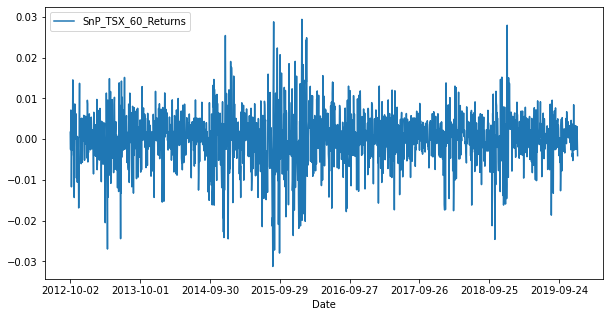

In [99]:
# plot daily returns  - S&P TSX 60
df_sr.plot(figsize=(10,5))

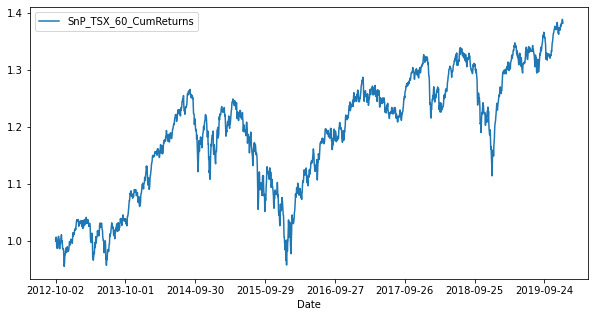

In [100]:
# plot daily returns  - S&P TSX 60
df_sr_cumulative.plot(figsize=(10,5))

### 13. Initial Data Overview - S&P (Market Representation)

<li> The standard deviation, as expected is the lowst of all portfolios, as this represents the market index and so should not fluctuate as much as other portfolios. It is the leeast risky. The closest other sub-portfolio with lowest risk is Whale_Paulson_Daily_Returns.
    
<li> Lack of gaps in chart indicate there are no data gaps, and the lack of extreme fluctuations indicates the data is consistent

<li>The returns of individual portfolios would be expected to be higher than the SnP (given higher risk) but this is not always the case, as shall be explored in the analysis sectiond

## D. Combine Whale, Algorithmic, and S&P TSX 60 Returns

### 1. Merge daily returns dataframes from all portfolios

In [101]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Date`)
merged_analysis_df_tmp = pd.concat([df_wr, df_ar ], axis="columns", join="inner")

In [102]:
merged_analysis_df_tmp.head(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   

            Algo1_Daily_Returns  Algo2_Daily_Returns  
Date                                                  
2015-03-03            -0.001942            -0.000949  
2015-03-04            -0.008589             0.002416  
2015-03-05            -0.000955             0.004323

In [103]:
# Use the `concat` function to combine the two DataFrames by matching indexes
merged_daily_returns_df = pd.concat([merged_analysis_df_tmp, df_sr ], axis="columns", join="inner")

In [104]:
merged_daily_returns_df.head(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03            -0.001942            -0.000949           -0.008530  
2015-03-04            -0.008589             0.002416           -0.003371  
2015-03-05            -0.000955             0.004323            0.001344

In [105]:
merged_daily_returns_df.tail(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2019-04-29                        0.001254                     0.002719   
2019-04-30                       -0.001295                    -0.002211   
2019-05-01                       -0.005847                    -0.001341   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2019-04-29                   0.006251                        0.005223   
2019-04-30                  -0.000259                       -0.003702   
2019-05-01                  -0.007936                       -0.007833   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2019-04-29             0.005208             0.002829           -0.000788  
2019-04-30            -0.002944            -0.001570           -0.001183  
2019-05-01             0.000094            -0.007358           -0.004703

In [106]:
merged_daily_returns_df.shape

(1029, 7)

# II Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

<li> First a daily returns comparison is reviewed for individual sub-portfolios
<li> Second a daily returns comparison is reviewed for portfolio level - comparing Whales and Algos

## A. Performance Anlysis

#### Calculate and Plot the daily returns

### 1. Compare daily returns of individual sub-portfolios

Text(0, 0.5, 'Date')

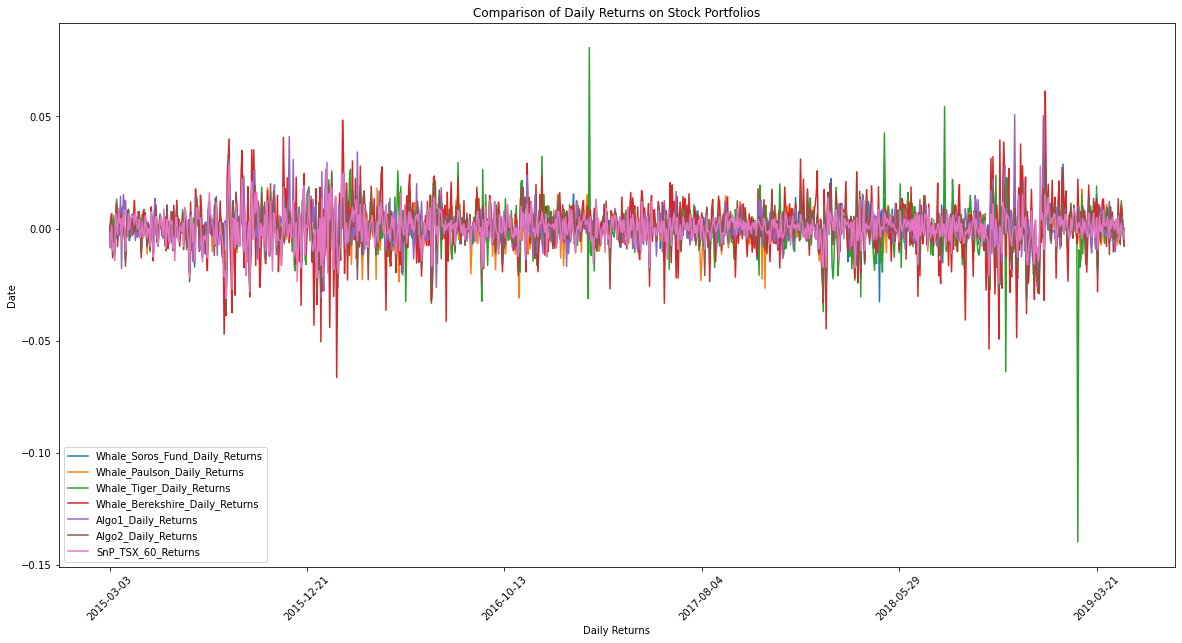

In [107]:
# Plot daily returns of all portfolios
drp = merged_daily_returns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Returns on Stock Portfolios')
drp.set_xlabel("Daily Returns")
drp.set_ylabel("Date")

#### Calculate and Plot cumulative returns.

### 2. Compare Cumulative Daily Returns

Calculations were already done in the first section

In [108]:
# Use the `concat` function to combine the two DataFrames by matching indexes
merged_cumulative__df_tmp = pd.concat([df_wr_cumulative, df_ar_cumulative ], axis="columns", join="inner")

In [109]:
merged_daily_cumreturns_df = pd.concat([merged_cumulative__df_tmp, df_sr_cumulative ], axis="columns", join="inner")

In [110]:
merged_daily_cumreturns_df.head()

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2015-03-03                           0.998734                        0.995019   
2015-03-04                           1.000962                        0.998245   
2015-03-05                           1.004981                        1.002314   
2015-03-06                           0.997037                        0.998731   
2015-03-09                           0.997617                        1.002951   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  \
Date                                                                          
2015-03-03                      0.999504                           0.993431   
2015-03-04                      0.996972                           0.997617   
2015-03-05                      0.999319                           1.004327   
2015-03-06                      0.990844                           0.991172   
2015-03-09                      0.996633                           0.989534   

            Algo1_Daily_CumReturns  Algo2_Daily_CumReturns  \
Date                                                         
2015-03-03                1.104979                1.156329   
2015-03-04                1.095489                1.159122   
2015-03-05                1.094442                1.164134   
2015-03-06                1.089018                1.150792   
2015-03-09                1.083086                1.152292   

            SnP_TSX_60_CumReturns  
Date                               
2015-03-03               1.223413  
2015-03-04               1.219289  
2015-03-05               1.220928  
2015-03-06               1.208753  
2015-03-09               1.200830

Text(0, 0.5, 'Date')

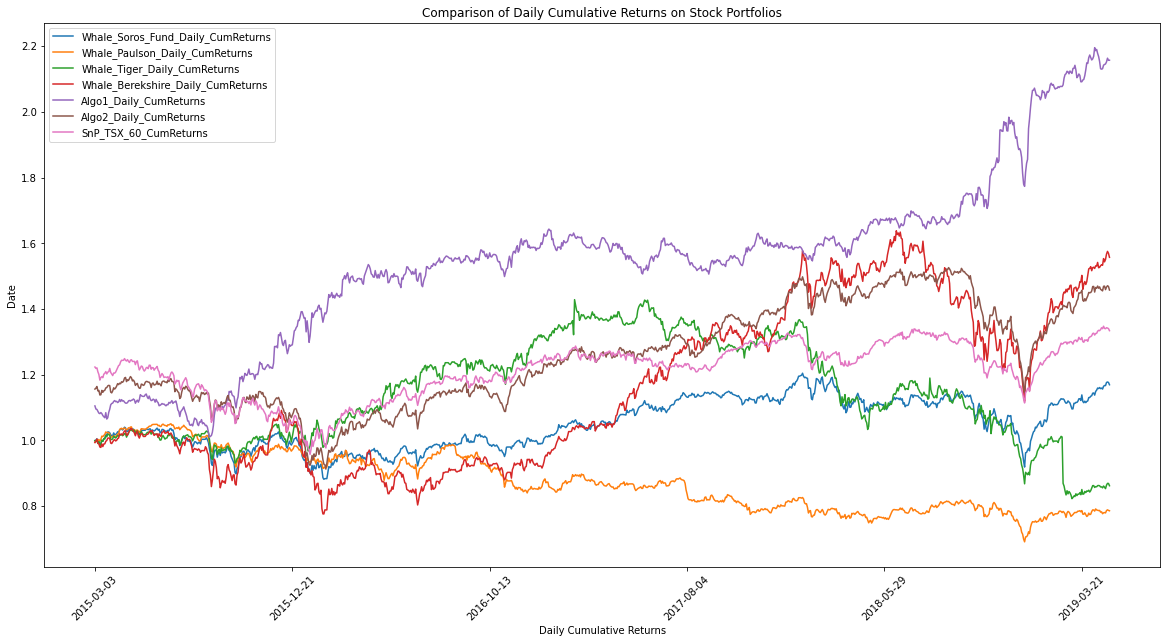

In [111]:
# Plot cumulative returns

dcrp = merged_daily_cumreturns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Cumulative Returns on Stock Portfolios')
dcrp.set_xlabel("Daily Cumulative Returns")
dcrp.set_ylabel("Date")


### 3. Compare portfolio level daily returns

In [112]:
# create a copy of the daily returns and add the portoflio level columns
portfolio_daily_return = merged_daily_returns_df.copy()

In [113]:

portfolio_daily_return['Whale_Portfolio_Daily_Returns'] = portfolio_df_wr

In [114]:
portfolio_daily_return['Algo_Portfolio_Daily_Returns'] = portfolio_df_ar 

In [115]:
portfolio_daily_return.head(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.002230                     0.003241   
2015-03-05                        0.004016                     0.004076   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.002534                        0.004213   
2015-03-05                   0.002355                        0.006726   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  \
Date                                                                       
2015-03-03            -0.001942            -0.000949           -0.008530   
2015-03-04            -0.008589             0.002416           -0.003371   
2015-03-05            -0.000955             0.004323            0.001344   

            Whale_Portfolio_Daily_Returns  Algo_Portfolio_Daily_Returns  
Date                                                                     
2015-03-03                      -0.003328                     -0.001446  
2015-03-04                       0.001788                     -0.003086  
2015-03-05                       0.004293                      0.001684

In [116]:
portfolio_daily_return.tail(3)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2019-04-29                        0.001254                     0.002719   
2019-04-30                       -0.001295                    -0.002211   
2019-05-01                       -0.005847                    -0.001341   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2019-04-29                   0.006251                        0.005223   
2019-04-30                  -0.000259                       -0.003702   
2019-05-01                  -0.007936                       -0.007833   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  \
Date                                                                       
2019-04-29             0.005208             0.002829           -0.000788   
2019-04-30            -0.002944            -0.001570           -0.001183   
2019-05-01             0.000094            -0.007358           -0.004703   

            Whale_Portfolio_Daily_Returns  Algo_Portfolio_Daily_Returns  
Date                                                                     
2019-04-29                       0.003862                      0.004019  
2019-04-30                      -0.001867                     -0.002257  
2019-05-01                      -0.005739                     -0.003632

In [117]:
portfolio_daily_return.describe()

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
count                     1029.000000                  1029.000000   
mean                         0.000141                    -0.000241   
std                          0.007828                     0.006982   
min                         -0.032711                    -0.032099   
25%                         -0.003662                    -0.004038   
50%                          0.000529                     0.000000   
75%                          0.004330                     0.003621   
max                          0.029881                     0.027032   

       Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
count                1029.000000                     1029.000000   
mean                   -0.000099                        0.000377   
std                     0.010883                        0.012826   
min                    -0.139820                       -0.066505   
25%                    -0.004784                       -0.005725   
50%                     0.000295                        0.000635   
75%                     0.005324                        0.007516   
max                     0.080705                        0.061341   

       Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  \
count          1029.000000          1029.000000         1029.000000   
mean              0.000713             0.000208            0.000087   
std               0.007589             0.008326            0.007034   
min              -0.030951            -0.036937           -0.031241   
25%              -0.003139            -0.003892           -0.003668   
50%               0.000143             0.000629            0.000587   
75%               0.004038             0.005256            0.004237   
max               0.050735             0.030509            0.029389   

       Whale_Portfolio_Daily_Returns  Algo_Portfolio_Daily_Returns  
count                    1029.000000                   1029.000000  
mean                        0.000045                      0.000461  
std                         0.007890                      0.006383  
min                        -0.032958                     -0.029612  
25%                        -0.003595                     -0.002676  
50%                         0.000239                      0.000482  
75%                         0.004264                      0.003575  
max                         0.037954                      0.034182

In [118]:
portfolio_daily_return_only = portfolio_daily_return[['SnP_TSX_60_Returns','Whale_Portfolio_Daily_Returns', 'Algo_Portfolio_Daily_Returns']]

Text(0, 0.5, 'Date')

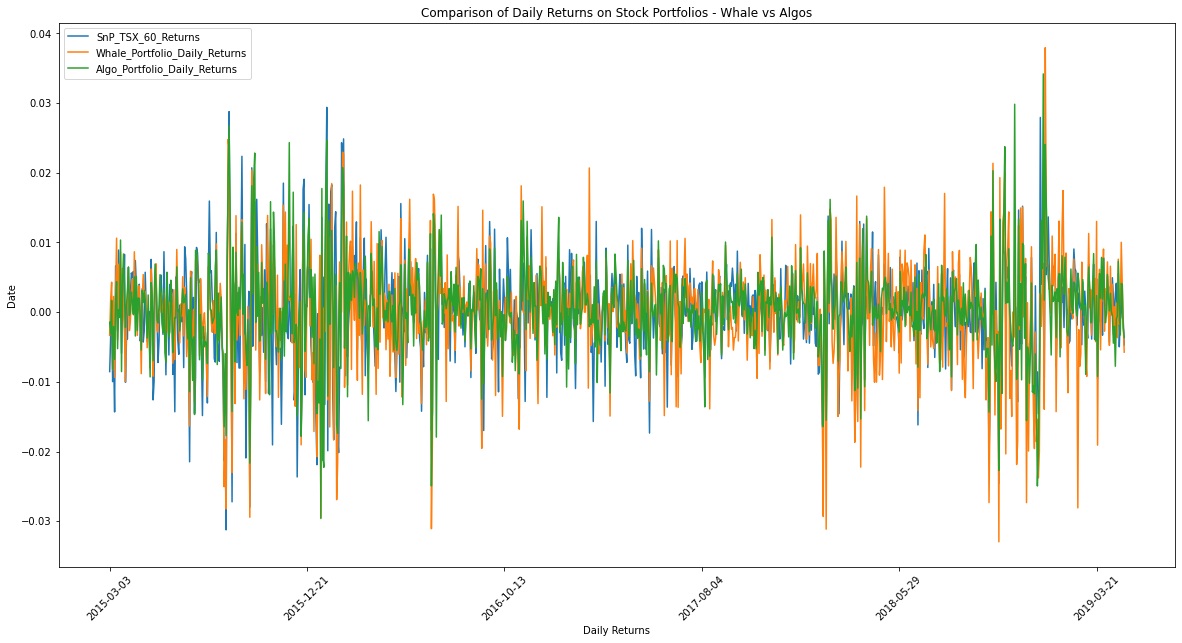

In [119]:
dcrp = portfolio_daily_return_only.plot(figsize=(20,10), rot=45, title='Comparison of Daily Returns on Stock Portfolios - Whale vs Algos')
dcrp.set_xlabel("Daily Returns")
dcrp.set_ylabel("Date")

### 4. Compare portfolio level cumulative daily returns

In [121]:
# Copy cumulative daily retrurns df to include portfolio
portfolio_daily_cumreturns = merged_daily_cumreturns_df.copy()

In [122]:
# add porrtfolio level cumulative daily returned for whales and algos

Text(0, 0.5, 'Date')

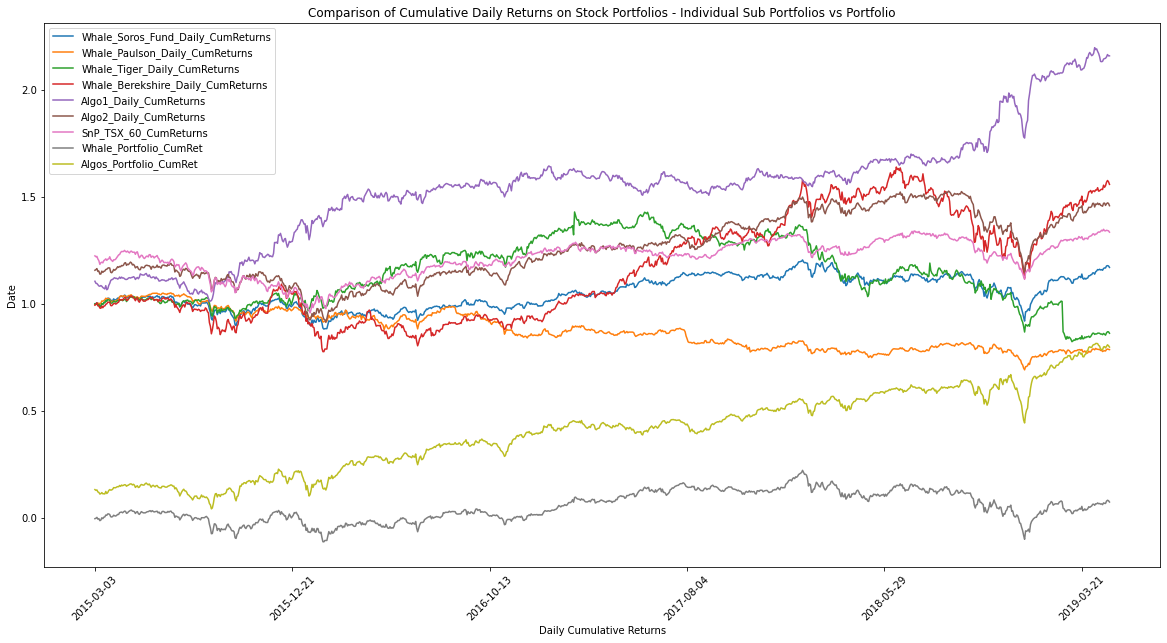

In [125]:
dcrp = portfolio_daily_cumreturns.plot(figsize=(20,10), rot=45, title='Comparison of Cumulative Daily Returns on Stock Portfolios - Individual Sub Portfolios vs Portfolio')
dcrp.set_xlabel("Daily Cumulative Returns")
dcrp.set_ylabel("Date")

In [126]:
portfolio_daily_cumreturns.tail(1)

Whale_Soros_Fund_Daily_CumReturns  Whale_Paulson_Daily_CumReturns  \
Date                                                                            
2019-05-01                           1.169477                        0.785905   

            Whale_Tiger_Daily_CumReturns  Whale_Berekshire_Daily_CumReturns  \
Date                                                                          
2019-05-01                      0.862145                           1.557207   

            Algo1_Daily_CumReturns  Algo2_Daily_CumReturns  \
Date                                                         
2019-05-01                2.157201                1.457700   

            SnP_TSX_60_CumReturns  Whale_Portfolio_CumRet  \
Date                                                        
2019-05-01               1.334074                0.074352   

            Algos_Portfolio_CumRet  
Date                                
2019-05-01                0.797683

## Interim Interprtation of Portfolio Return Analysis 

In [168]:
np.mean([1.169477, 0.785905, 0.785905, 1.557207]) # average whale return

1.0746235

In [169]:
np.mean([2.157201, 1.457700]) # average algo return

1.8074505

---

## B. Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### 1. Create a box plot for each portfolio


Text(17.200000000000017, 0.5, 'Date')

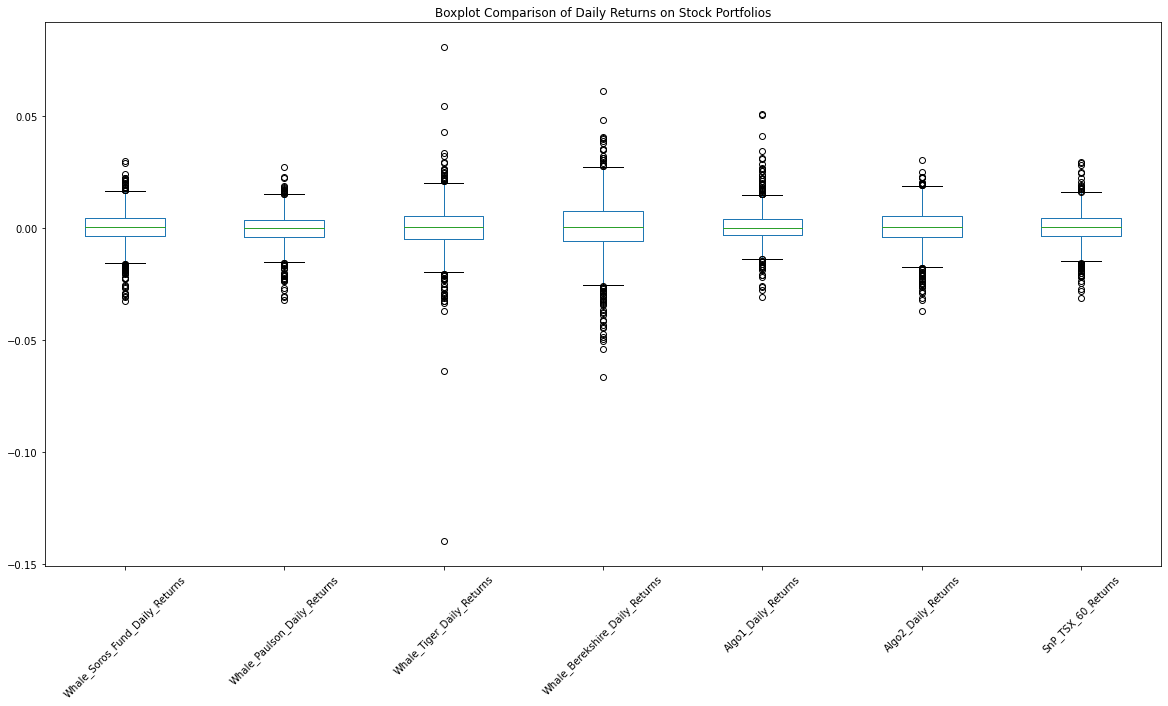

In [127]:
# Box plot to visually show risk
mcrb = merged_daily_returns_df.plot.box(figsize=(20,10), rot=45, title='Boxplot Comparison of Daily Returns on Stock Portfolios')
dcrp.set_xlabel("Daily Returns")
dcrp.set_ylabel("Date")

### 2. Calculate Standard Deviations

In [128]:
# Daily standard deviation of daily returns sorted in ascending ordeer
daily_std = merged_daily_returns_df.std()

In [129]:
daily_std.sort_values()

Whale_Paulson_Daily_Returns      0.006982
SnP_TSX_60_Returns               0.007034
Algo1_Daily_Returns              0.007589
Whale_Soros_Fund_Daily_Returns   0.007828
Algo2_Daily_Returns              0.008326
Whale_Tiger_Daily_Returns        0.010883
Whale_Berekshire_Daily_Returns   0.012826
dtype: float64

In [140]:
daily_std_df = pd.DataFrame(data=daily_std);

In [142]:
daily_std_df.columns

RangeIndex(start=0, stop=1, step=1)

In [143]:
.columns = ['Portolio_std']

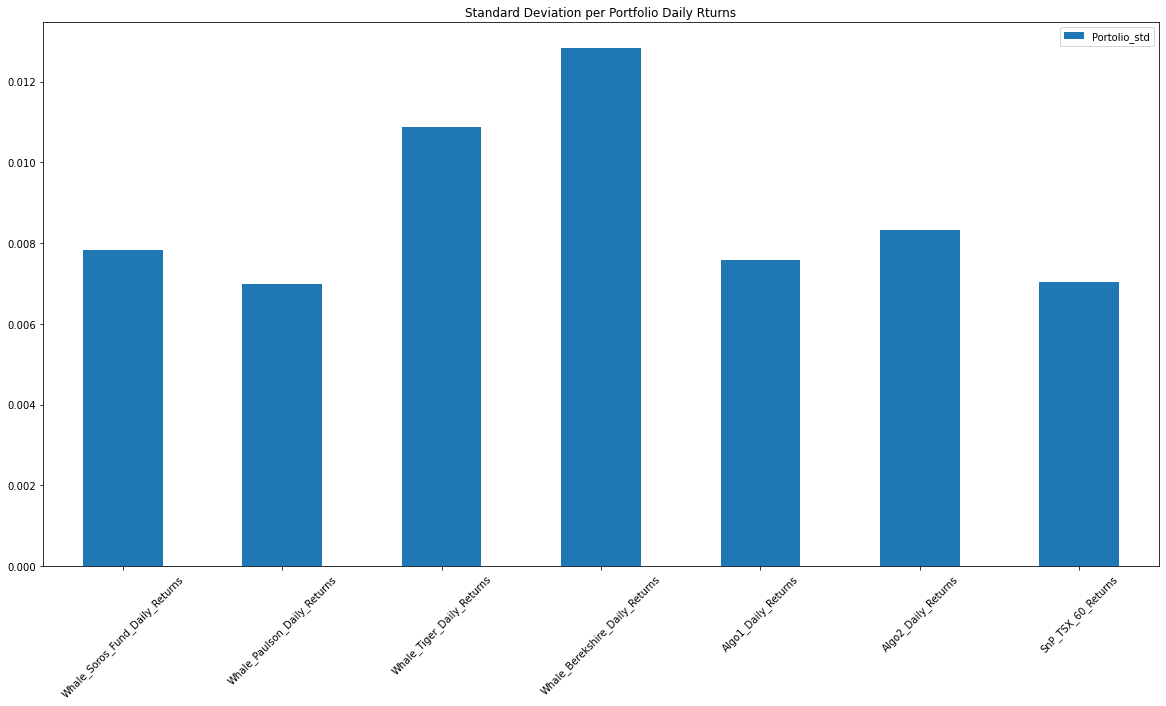

In [171]:


# Draw a vertical bar chart

daily_std_df.plot.bar(figsize=(20,10), rot=45, title="Standard Deviation per Portfolio Daily Rturns");


### 3. Standard deviation for S&P TSX 60

In [130]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_SnP60_std = merged_daily_returns_df['SnP_TSX_60_Returns'].std()

In [131]:
daily_SnP60_std

0.007034167748577725

### 4. Determine which portfolios are riskier than the S&P TSX 60

As expected, all the portfolios are riskier than S&P_TSX_60's std value of 0.07034,  (S&P_TSX_60 is a collection of the 60 largest companies in Toronto Stock Exchange) except Paulson Whale portfolio, with a verly slightlyc lower std value of 0.006982. The Standards and Poor Toronto exchange acts as a market index and generally has lower volatility than individual stocks. It is set as a baseline for portfolio performnance from a risk and return perspective. Indexes generally have lower risk and lower return.

There are a number of explanations why the Paulson portfolio has lower risk. One possiblity is that the postfolio itself is spread widely so as to form another type of index of the market. Another possiblity is that the Paulson portfolio has stocks in a less volatile market than the Canadian exchange. Without analysing the contents of Paulson portfolio, it is difficult to determine. 

The most volatile/risky is The Whale Berkshire portfolio is 0.012826. The question is whether this also leads to the highest return. The annualised standard deviation provides a more stanardised  approach to volatility. However, as per below, the outcome is the same in terms of order relativee to S&P TSX 60. 

### 5. Calculate the Annualized Standard Deviation

In [146]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = daily_std * np.sqrt(252)

In [147]:
annualised_std_df =pd.DataFrame(data=annualised_std);

In [149]:
annualised_std_df.columns = ['Portfolio_annualised_std']

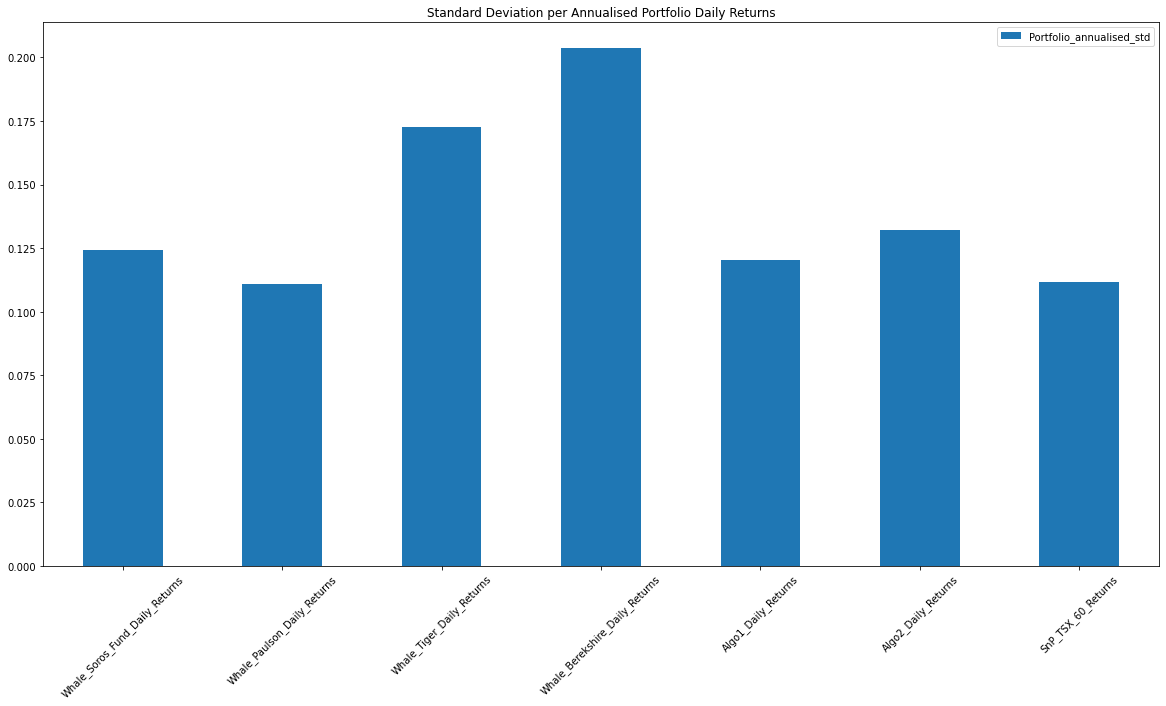

In [172]:


# Draw a vertical bar chart

annualised_std_df.plot.bar(figsize=(20,10), rot=45,  title="Standard Deviation per Annualised Portfolio Daily Returns");

In [133]:
annualised_std.sort_values()

Whale_Paulson_Daily_Returns      0.110841
SnP_TSX_60_Returns               0.111664
Algo1_Daily_Returns              0.120470
Whale_Soros_Fund_Daily_Returns   0.124259
Algo2_Daily_Returns              0.132177
Whale_Tiger_Daily_Returns        0.172759
Whale_Berekshire_Daily_Returns   0.203599
dtype: float64

In order to provide a standard measure across volatility and risk, the annualised standard deviation is used where the standard deviation is multiplied by the square root of the number of trading days in a year. 

---

## D. Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### 1. Calculate and plot rolling `std` for all portfolios with 21-day window

In [152]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll21_std = merged_daily_returns_df.rolling(window=21).std()

roll21_std.head()

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                             nan                          nan   
2015-03-04                             nan                          nan   
2015-03-05                             nan                          nan   
2015-03-06                             nan                          nan   
2015-03-09                             nan                          nan   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                        nan                             nan   
2015-03-04                        nan                             nan   
2015-03-05                        nan                             nan   
2015-03-06                        nan                             nan   
2015-03-09                        nan                             nan   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03                  nan                  nan                 nan  
2015-03-04                  nan                  nan                 nan  
2015-03-05                  nan                  nan                 nan  
2015-03-06                  nan                  nan                 nan  
2015-03-09                  nan                  nan                 nan

Text(0, 0.5, 'Standard Deviation')

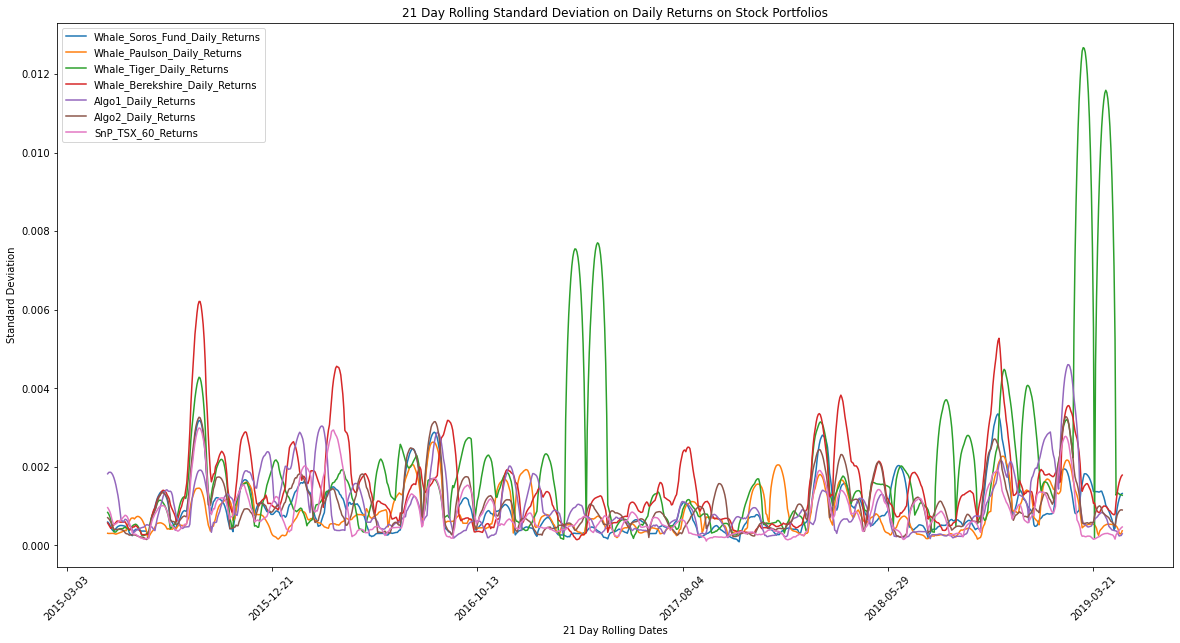

In [135]:
# Plot the rolling standard deviation on all daily return (not closing price)
rollsp = roll21_std.rolling(window=21).std().plot(figsize=(20,10), rot=45, title='21 Day Rolling Standard Deviation on Daily Returns on Stock Portfolios')
rollsp.set_xlabel("21 Day Rolling Dates")
rollsp.set_ylabel("Standard Deviation")

A rolling standard deviation helps demonstrate a smooth continuity of risk change over time. One noticeable factor in the results is the Tigr portfolio, which shows two peaks in volatility, though it is not the most volatil portfolio overall (Berkshire is). It may mean, that given a set of market circumstances and timing, gains or losses for this portfolio could be higher than average, but only during those windows.  

### 2. Calculate and plot the correlation

In [137]:
# Calculate the correlation between each column
correlation = merged_daily_returns_df.corr()
correlation


Whale_Soros_Fund_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        1.000000   
Whale_Paulson_Daily_Returns                           0.697076   
Whale_Tiger_Daily_Returns                             0.560964   
Whale_Berekshire_Daily_Returns                        0.750181   
Algo1_Daily_Returns                                   0.313795   
Algo2_Daily_Returns                                   0.826667   
SnP_TSX_60_Returns                                    0.673930   

                                Whale_Paulson_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                     0.697076   
Whale_Paulson_Daily_Returns                        1.000000   
Whale_Tiger_Daily_Returns                          0.433034   
Whale_Berekshire_Daily_Returns                     0.540033   
Algo1_Daily_Returns                                0.266363   
Algo2_Daily_Returns                                0.674015   
SnP_TSX_60_Returns                                 0.486511   

                                Whale_Tiger_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                   0.560964   
Whale_Paulson_Daily_Returns                      0.433034   
Whale_Tiger_Daily_Returns                        1.000000   
Whale_Berekshire_Daily_Returns                   0.423524   
Algo1_Daily_Returns                              0.161236   
Algo2_Daily_Returns                              0.506689   
SnP_TSX_60_Returns                               0.440583   

                                Whale_Berekshire_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        0.750181   
Whale_Paulson_Daily_Returns                           0.540033   
Whale_Tiger_Daily_Returns                             0.423524   
Whale_Berekshire_Daily_Returns                        1.000000   
Algo1_Daily_Returns                                   0.289378   
Algo2_Daily_Returns                                   0.684609   
SnP_TSX_60_Returns                                    0.557250   

                                Algo1_Daily_Returns  Algo2_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns             0.313795             0.826667   
Whale_Paulson_Daily_Returns                0.266363             0.674015   
Whale_Tiger_Daily_Returns                  0.161236             0.506689   
Whale_Berekshire_Daily_Returns             0.289378             0.684609   
Algo1_Daily_Returns                        1.000000             0.285455   
Algo2_Daily_Returns                        0.285455             1.000000   
SnP_TSX_60_Returns                         0.310276             0.737370   

                                SnP_TSX_60_Returns  
Whale_Soros_Fund_Daily_Returns            0.673930  
Whale_Paulson_Daily_Returns               0.486511  
Whale_Tiger_Daily_Returns                 0.440583  
Whale_Berekshire_Daily_Returns            0.557250  
Algo1_Daily_Returns                       0.310276  
Algo2_Daily_Returns                       0.737370  
SnP_TSX_60_Returns                        1.000000

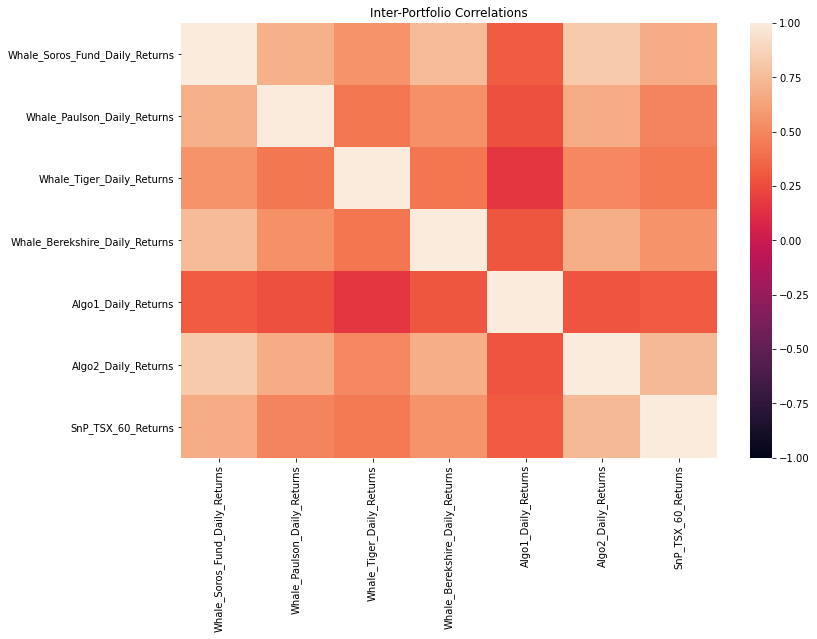

In [153]:
# Display correlation matrix

import matplotlib.pyplot as plt

fig = plt.gcf()

# Set the title
plt.title('Inter-Portfolio Correlations')

# Change seaborn plot size
fig.set_size_inches(12, 8)


sns.heatmap(correlation, vmin=-1, vmax=1)

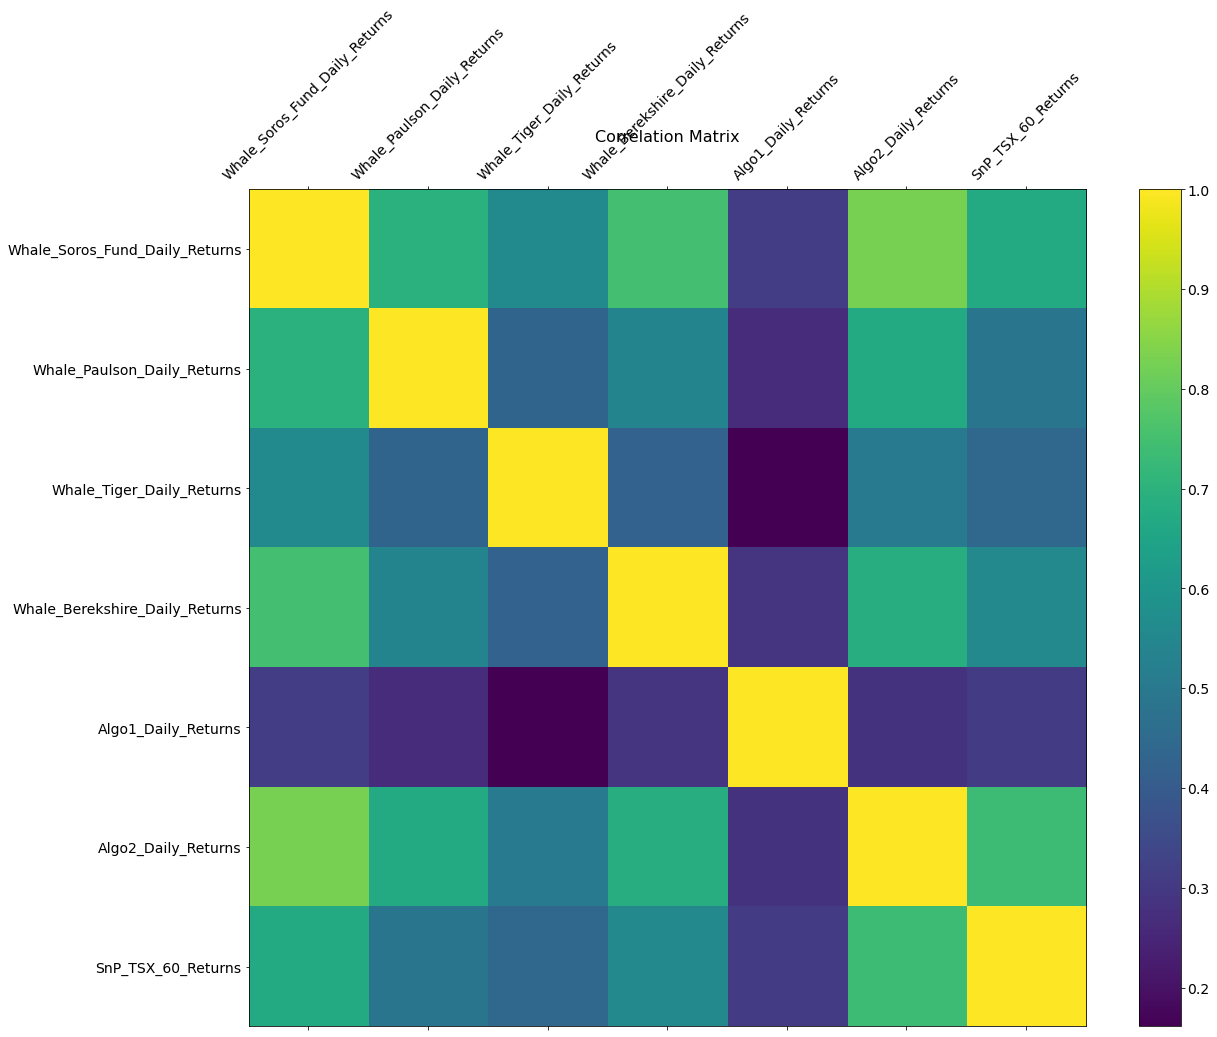

In [155]:
# another similar view with more contrast

f = plt.figure(figsize=(19, 15))
plt.matshow(correlation, fignum=f.number)
plt.xticks(range(correlation.shape[1]), correlation.columns, fontsize=14, rotation=45)
plt.yticks(range(correlation.shape[1]), correlation.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

The reason to calculate the correlation between portfolios is to assess the risk of "putting all egs in one basket", meaning that if a portfolio is highly correlated with another in one suite, it may mean that should disaster trike, eg one sector of the market goes down markedly, and your stocks happen to be in that sector, then your will be more impacted by this. 

One strategy to mitigat this is to invest in portfolios that are diverse, meaning they have zero or negative correlation with one another.

From the graph above, Algo 2 and Soros are the most highly correlated, at 0.826667. The lowest correlated are Algo1 and Whale Tiger 0.161236. There are no evident negative correlations. A positive for Algo1 is that it is not strongly correlated with any other portfolio and therefore provides a diversified investment,and therefore some risk mitigation against cumulative downturn impact. 

### 3. Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [156]:

# Covariance of Whales against SnP TSX 60 Returns
Whale_Soros_Covariance = df_wr["Whale_Soros_Fund_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Whale_Paulson_Covariance = df_wr["Whale_Paulson_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Whale_Tiger_Covariance = df_wr["Whale_Tiger_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Whale_Berekshire_Covariance = df_wr["Whale_Berekshire_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])

# Display the covariance of each whale sub-portfolio
print("Soros Covariance: ", "%.16f" % Whale_Soros_Covariance)
print("Paulson Covariance: ", "%.16f" % Whale_Paulson_Covariance)
print("Tiger Covariance: ", "%.16f" % Whale_Tiger_Covariance)
print("Berekshire Covariance: ", "%.16f" % Whale_Berekshire_Covariance)


Soros Covariance:  0.0000368908254085
Paulson Covariance:  0.0000237575445132
Tiger Covariance:  0.0000335320597564
Berekshire Covariance:  0.0000499796288463


In [157]:
# Covariance of Whales against SnP TSX 60 Returns
Algo1_Covariance = df_ar["Algo1_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Algo2_Covariance = df_ar["Algo2_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])

# Display the covariance of each whale sub-portfolio
print("Algo1 Covariance: ", "%.16f" % Algo1_Covariance)
print("Algo2 Covariance: ", "%.16f" % Algo2_Covariance)



Algo1 Covariance:  0.0000180761968037
Algo2 Covariance:  0.0000428478621474


In [158]:
# covariance of algos portfolio (within the portfolio)
covariance_algo = df_ar.cov()
covariance_algo

Algo1_Daily_Returns  Algo2_Daily_Returns
Algo1_Daily_Returns             0.000064             0.000023
Algo2_Daily_Returns             0.000023             0.000072

In [159]:
# covariance of s&p 60 TSR portfolio
covariance_snp = df_sr.cov()
covariance_snp

SnP_TSX_60_Returns
SnP_TSX_60_Returns            0.000044

In [160]:
# Calculate covariance of a single sub-portfolio streams in portfolios
# how each individual sub-portfolios covary with other sub-portfolios
# similar evaluation to correlation heat map
covariance_a = merged_daily_returns_df.cov()
covariance_a

Whale_Soros_Fund_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        0.000061   
Whale_Paulson_Daily_Returns                           0.000038   
Whale_Tiger_Daily_Returns                             0.000048   
Whale_Berekshire_Daily_Returns                        0.000075   
Algo1_Daily_Returns                                   0.000019   
Algo2_Daily_Returns                                   0.000054   
SnP_TSX_60_Returns                                    0.000037   

                                Whale_Paulson_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                     0.000038   
Whale_Paulson_Daily_Returns                        0.000049   
Whale_Tiger_Daily_Returns                          0.000033   
Whale_Berekshire_Daily_Returns                     0.000048   
Algo1_Daily_Returns                                0.000014   
Algo2_Daily_Returns                                0.000039   
SnP_TSX_60_Returns                                 0.000024   

                                Whale_Tiger_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                   0.000048   
Whale_Paulson_Daily_Returns                      0.000033   
Whale_Tiger_Daily_Returns                        0.000118   
Whale_Berekshire_Daily_Returns                   0.000059   
Algo1_Daily_Returns                              0.000013   
Algo2_Daily_Returns                              0.000046   
SnP_TSX_60_Returns                               0.000034   

                                Whale_Berekshire_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns                        0.000075   
Whale_Paulson_Daily_Returns                           0.000048   
Whale_Tiger_Daily_Returns                             0.000059   
Whale_Berekshire_Daily_Returns                        0.000164   
Algo1_Daily_Returns                                   0.000028   
Algo2_Daily_Returns                                   0.000073   
SnP_TSX_60_Returns                                    0.000050   

                                Algo1_Daily_Returns  Algo2_Daily_Returns  \
Whale_Soros_Fund_Daily_Returns             0.000019             0.000054   
Whale_Paulson_Daily_Returns                0.000014             0.000039   
Whale_Tiger_Daily_Returns                  0.000013             0.000046   
Whale_Berekshire_Daily_Returns             0.000028             0.000073   
Algo1_Daily_Returns                        0.000058             0.000018   
Algo2_Daily_Returns                        0.000018             0.000069   
SnP_TSX_60_Returns                         0.000017             0.000043   

                                SnP_TSX_60_Returns  
Whale_Soros_Fund_Daily_Returns            0.000037  
Whale_Paulson_Daily_Returns               0.000024  
Whale_Tiger_Daily_Returns                 0.000034  
Whale_Berekshire_Daily_Returns            0.000050  
Algo1_Daily_Returns                       0.000017  
Algo2_Daily_Returns                       0.000043  
SnP_TSX_60_Returns                        0.000049

In [161]:
# Calculate variance of S&P TSX
variance_snp = df_sr.var()
variance_snp

SnP_TSX_60_Returns   0.000044
dtype: float64

In [162]:
# Beta Values for Whales Sub-Portfolios
# Calculate beta of all daily returns of whale portfolio
Soros_beta = Whale_Soros_Covariance / variance_snp
Paulson_beta = Whale_Paulson_Covariance / variance_snp
Tiger_beta = Whale_Tiger_Covariance / variance_snp
Berekshire_beta = Whale_Berekshire_Covariance / variance_snp


# Display the covariance of each Whale sub-portfolio
print("Soros Beta: ", "%.16f" % Soros_beta)
print("Paulson Beta: ", "%.16f" % Paulson_beta)
print("Tiger Beta: ", "%.16f" % Tiger_beta)
print("Berekshire Beta: ", "%.16f" % Berekshire_beta)
print("--------------------")

Average_Whale_beta = (Soros_beta  + Paulson_beta + Tiger_beta +  Berekshire_beta)/4
print("Average Whale Beta: ", "%.16f" % Average_Whale_beta)

Soros Beta:  0.8373890745840624
Paulson Beta:  0.5392752261303219
Tiger Beta:  0.7611480680473154
Berekshire Beta:  1.1344933241321515
--------------------
Average Whale Beta:  0.8180764232234627


In [173]:
# Beta Values for Algos Sub-Portfolios
# Calculate beta of all daily returns of Algos portfolio
Algo1_beta = Algo1_Covariance / variance_snp
Algo2_beta = Algo2_Covariance / variance_snp


# Display the covariance of each Algos sub-portfolio
print("Algo1 Beta: ", "%.16f" % Algo1_beta)
print("Algo2 Beta: ", "%.16f" % Algo2_beta)

print("--------------------")

Average_Algo_beta = (Algo1_beta  + Algo2_beta)/2
print("Average Algo Beta: ", "%.16f" % Average_Algo_beta)

Algo1 Beta:  0.4103136632433291
Algo2 Beta:  0.9726085343504617
--------------------
Average Algo Beta:  0.6914610987968954


In [179]:
# list of portfolio bta dictionaries
beta_portfolio_list = [Soros_beta,Paulson_beta,Tiger_beta,Berekshire_beta, Algo1_beta, Algo2_beta]

In [180]:
beta_portfolio_df =pd.DataFrame(data=beta_portfolio_list);

In [189]:
beta_portfolio_df.columns = ['Portfolio Betas']

In [190]:
beta_portfolio_df = beta_portfolio_df.rename(index={0: 'Soros_beta'})
beta_portfolio_df = beta_portfolio_df.rename(index={1: 'Paulson_beta'})
beta_portfolio_df = beta_portfolio_df.rename(index={2: 'Tiger_beta'})
beta_portfolio_df = beta_portfolio_df.rename(index={3: 'Berekshire_beta'})
beta_portfolio_df = beta_portfolio_df.rename(index={4: 'Algo1_beta'})
beta_portfolio_df = beta_portfolio_df.rename(index={5: 'Algo2_beta'})

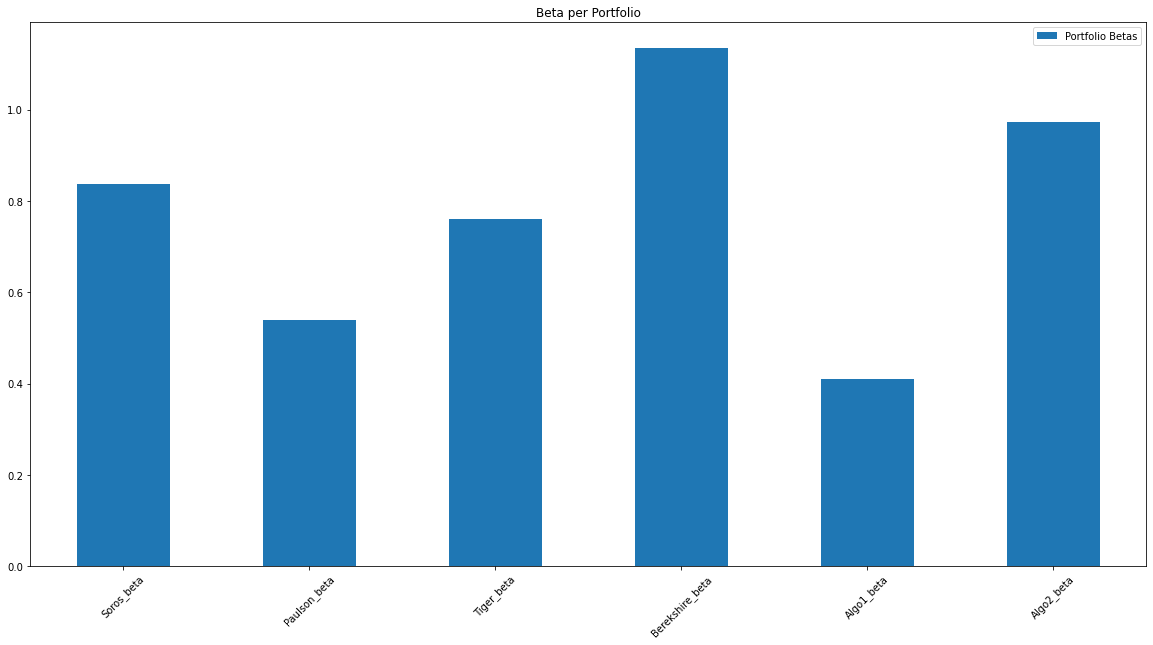

In [191]:
# Draw a vertical bar chart

beta_portfolio_df.plot.bar(figsize=(20,10), rot=45,  title="Beta per Portfolio");

Beta is an indication of risk against the market. It takes the covariance of the portfolio (a directional relationship between two variables (in this case the individual portfolio and the market), ie how strongly they vary together), and this is then divided by the  index (S&P TSX 60) variance.

A Beta of 1 is the same as the market. Algo 2 is the closest volatility to the market index at 0.97. The highest volatility compared to market, as alreaday indicated by the standard deviation analysis, is Berkshire. This is more volatile than the market at  1.13. 

The average whal beta is higher (0.818) than Algo Beta average (0.69).

Th lowest volatility is Algo 1, which show only 0.41. This adds to the argumnt that it is a stable stock portfolio to invest in. 

Generally, portfolios with higher volatility are expecteed to have higher returns, but in this case Algo1, had both the highest cumulative return and the lowest volatility, making it an attractive investment. 

### Rolling Beta

In [192]:
# 21 day rolling covariance of algo portfolio stocks vs. S&P TSX 60
rolling_algo1_covariance = merged_daily_returns_df["Algo1_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_algo2_covariance = merged_daily_returns_df["Algo2_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])

# 21 day rolling covariance of whale portfolio stocks vs. S&P TSX 60
rolling_Soros_covariance = merged_daily_returns_df["Whale_Soros_Fund_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Paulson_covariance =  merged_daily_returns_df["Whale_Paulson_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Tiger_covariance = merged_daily_returns_df["Whale_Tiger_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Berkshire_covariance = merged_daily_returns_df["Whale_Berekshire_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])

# 21 day rolling S&P TSX 60 covariance
rolling_SnP_covariance = merged_daily_returns_df["SnP_TSX_60_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])


# 21 day rolling variance of S&P TSX 60
rolling_variance = merged_daily_returns_df["SnP_TSX_60_Returns"].rolling(window=21).var()

# 21 day rolling beta of algo portfolio stocks vs. S&P TSX 60
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_algo2_beta = rolling_algo2_covariance / rolling_variance

# 21 day average beta for algo portfolio
rolling_average_algo_beta = (rolling_algo1_beta + rolling_algo1_beta)/2

# 21 day rolling beta of whale portfolio stocks vs. S&P TSX 60
rolling_Soros_beta = rolling_Soros_covariance / rolling_variance
rolling_Paulson_beta = rolling_Paulson_covariance / rolling_variance
rolling_Tiger_beta = rolling_Tiger_covariance / rolling_variance
rolling_Berkshire_beta = rolling_Berkshire_covariance / rolling_variance
rolling_SnP_Beta = rolling_SnP_covariance/ rolling_variance

# 21 day average beta for whale portfolio
rolling_average_whale_beta = (rolling_Soros_beta + rolling_Paulson_beta + rolling_Tiger_beta + rolling_Berkshire_beta)/4


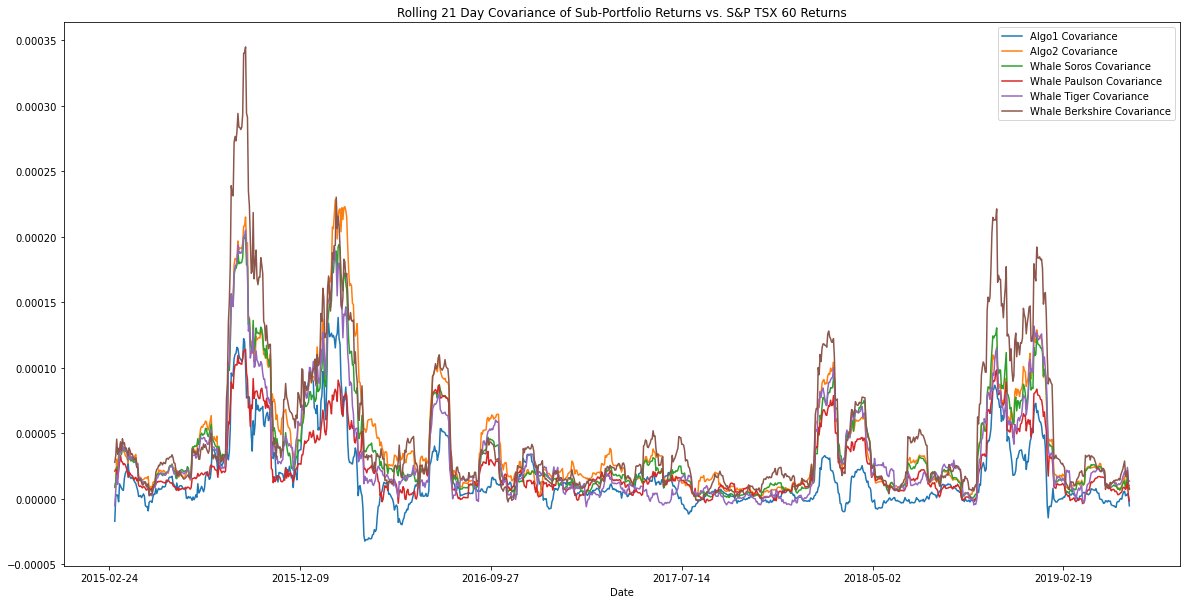

In [193]:
# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = rolling_algo1_covariance.plot(figsize=(20, 10), title="Rolling 21 Day Covariance of Sub-Portfolio Returns vs. S&P TSX 60 Returns")
rolling_algo2_covariance.plot(ax=ax)
rolling_Soros_covariance.plot(ax=ax)
rolling_Paulson_covariance.plot(ax=ax)
rolling_Tiger_covariance.plot(ax=ax)
rolling_Berkshire_covariance.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1 Covariance", "Algo2 Covariance", "Whale Soros Covariance", "Whale Paulson Covariance", "Whale Tiger Covariance","Whale Berkshire Covariance"])

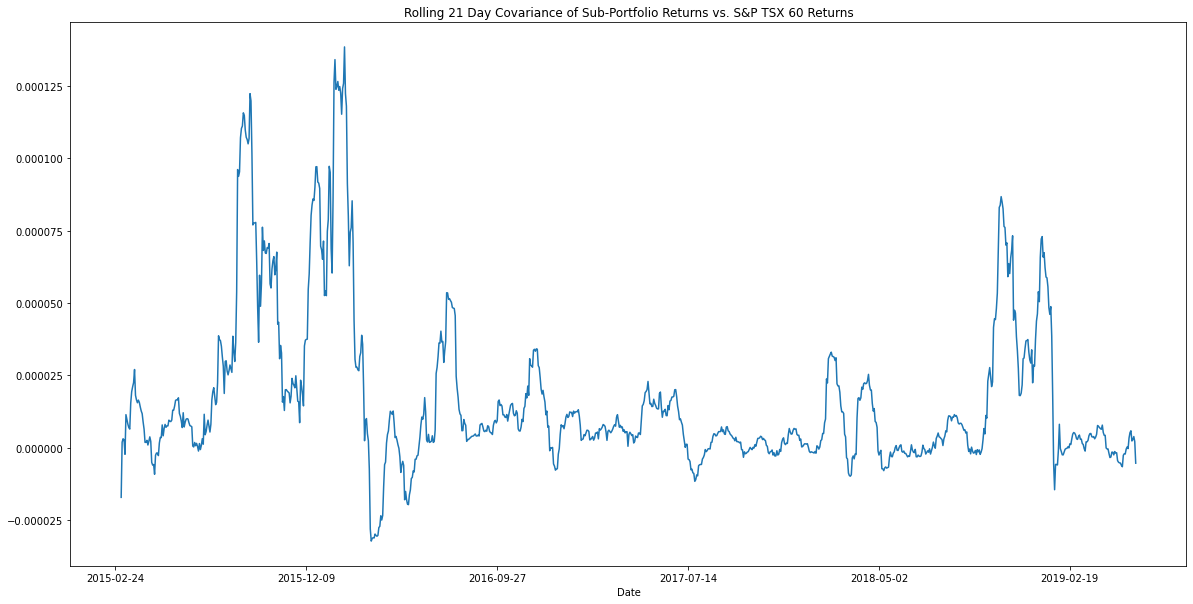

In [194]:

rolling_algo1_covariance.plot(figsize=(20, 10), title='Rolling 21 Day Covariance of Sub-Portfolio Returns vs. S&P TSX 60 Returns')

In [195]:
rolling_algo1_beta.describe()

count   1009.000000
mean       0.222932
std        0.305062
min       -0.796430
25%        0.044204
50%        0.252115
75%        0.426057
max        1.024327
dtype: float64

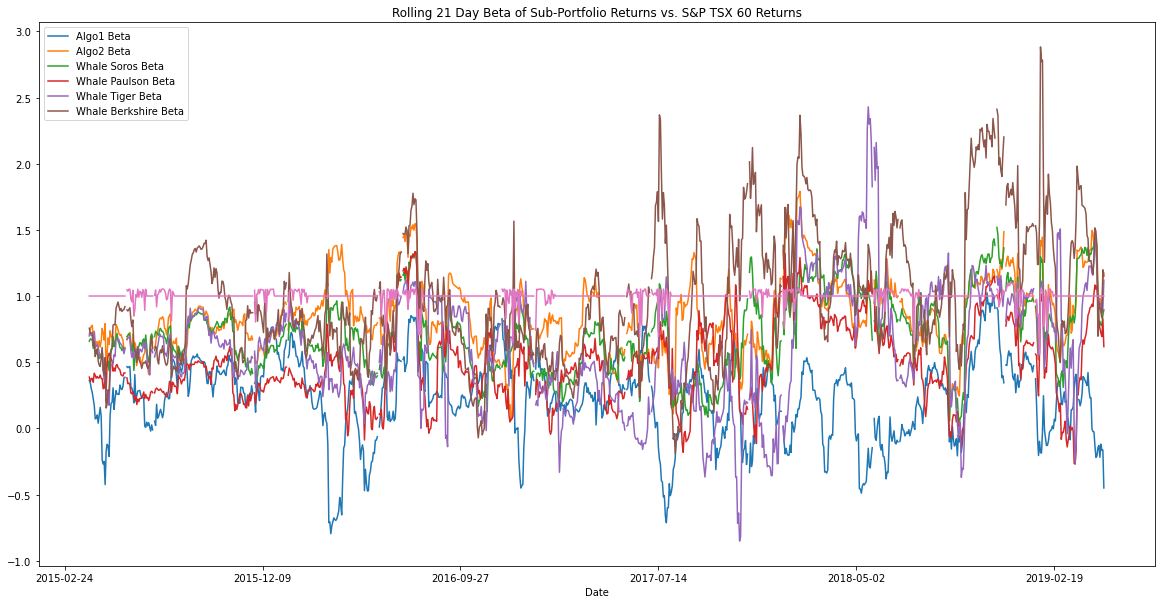

In [196]:


# Plot beta trend
# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = rolling_algo1_beta.plot(figsize=(20, 10), title="Rolling 21 Day Beta of Sub-Portfolio Returns vs. S&P TSX 60 Returns")
rolling_algo2_beta.plot(ax=ax)
rolling_Soros_beta.plot(ax=ax)
rolling_Paulson_beta.plot(ax=ax)
rolling_Tiger_beta.plot(ax=ax)
rolling_Berkshire_beta.plot(ax=ax)
rolling_SnP_Beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1 Beta", "Algo2 Beta", "Whale Soros Beta", "Whale Paulson Beta", "Whale Tiger Beta","Whale Berkshire Beta"])

## E. Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [197]:
### 1. Show mean and stanadrd deviation exponentially weighted average

In [201]:

ewm_21_mean = merged_daily_returns_df.ewm(halflife=21).mean()

In [202]:
ewm_21_mean.head()

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   
2015-03-04                        0.000511                    -0.000802   
2015-03-05                        0.001718                     0.000878   
2015-03-06                       -0.000808                    -0.000291   
2015-03-09                       -0.000511                     0.000673   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   
2015-03-04                  -0.001532                       -0.001089   
2015-03-05                  -0.000193                        0.001603   
2015-03-06                  -0.002369                       -0.002256   
2015-03-09                  -0.000616                       -0.002128   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03            -0.001942            -0.000949           -0.008530  
2015-03-04            -0.005320             0.000761           -0.005908  
2015-03-05            -0.003817             0.001988           -0.003410  
2015-03-06            -0.004116            -0.001542           -0.005133  
2015-03-09            -0.004400            -0.000935           -0.005436

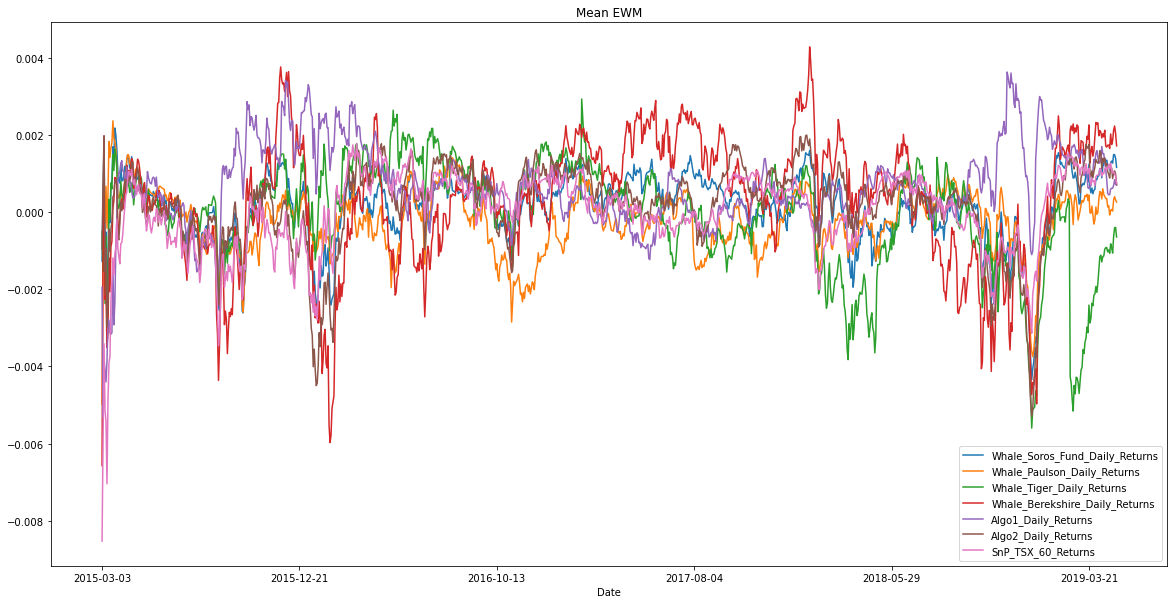

In [203]:
ewm_21_mean.plot(figsize=(20, 10), title="Mean EWM")

In [204]:
ewm_21_std = merged_daily_returns_df.ewm(halflife=21).std()

In [205]:
ewm_21_std.head()

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                             nan                          nan   
2015-03-04                        0.002472                     0.005814   
2015-03-05                        0.002677                     0.004968   
2015-03-06                        0.005349                     0.004615   
2015-03-09                        0.004638                     0.004471   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                        nan                             nan   
2015-03-04                   0.001441                        0.007624   
2015-03-05                   0.002478                        0.007020   
2015-03-06                   0.004665                        0.009387   
2015-03-09                   0.005496                        0.008066   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03                  nan                  nan                 nan  
2015-03-04             0.004700             0.002380            0.003648  
2015-03-05             0.004162             0.002662            0.004936  
2015-03-06             0.003419             0.007166            0.005205  
2015-03-09             0.002999             0.006290            0.004517

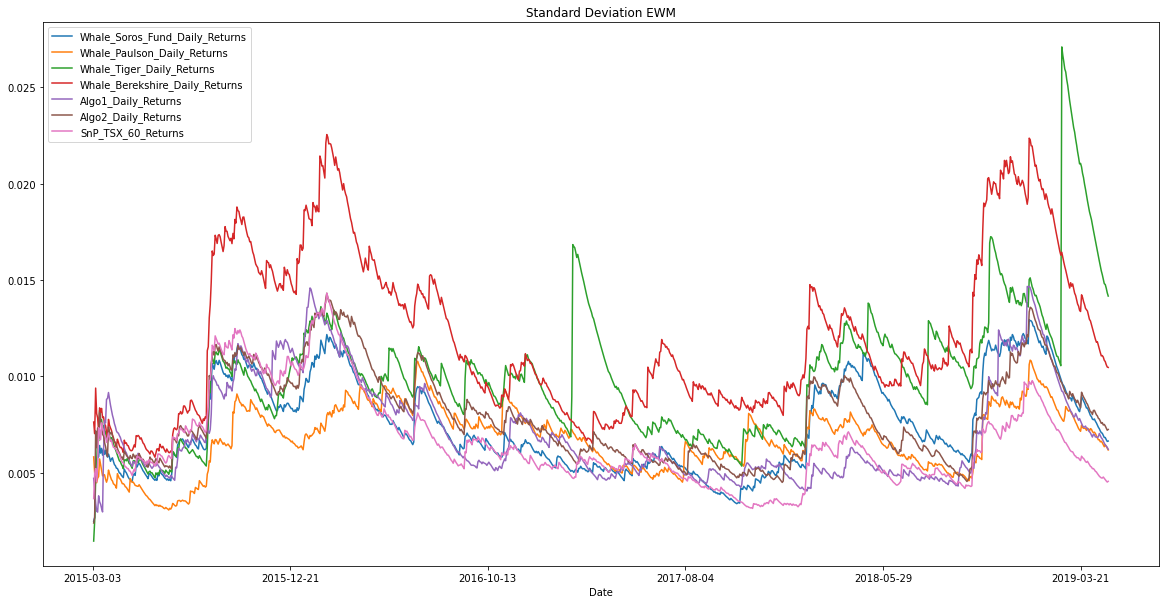

In [206]:
ewm_21_std.plot(figsize=(20, 10), title="Standard Deviation EWM")

### 2. EWM end of section discussion

Exponentially Weighted Mean analysis provides an emphasis on more recent events by providing an exponential "decay" of weights values going back in time, growing smaller further back in times. In this instance a half life of 21 days is used, meaning that at that point the weights would have "decayed" exponentially to 50% of the most recent value.  The theory behind this is that more recent events are more relevant and accurate to the current market conditions and should therefore have more weight.  

In the standard deviation, the recent volatility is emphasised, and Tiger stands out as having higher risk in the nearer term, along with Berkshire. The Algos and, of course the index, retain lower volatility/risk with this weighting, which is consistent with earlier general standard deviation studies and beta review. 

A look at the mean return, shows recent trends in Tiger and Berekshir trending into the negative return, a warning that recent performance is not strong, and is getting weaker. This is important information that is not shown in the earlir cumulative preformance review, where all portfolios showed a final positive outcome, eeven the worst pereforming like Tiger. Paulson is also trending toward negative, more recent values close to zero. However, the other portfolios remain positive.  

---

# III Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### 1. Using the daily returns, calculate and visualise the Sharpe ratios using a bar plot

In [207]:
# Annualised Sharpe Ratios
sharpe_ratios = (merged_daily_returns_df.mean() * 252) / (merged_daily_returns_df.std() * np.sqrt(252))



In [208]:
sharpe_ratios.sort_values(ascending = False)

Algo1_Daily_Returns               1.491514
Whale_Berekshire_Daily_Returns    0.467045
Algo2_Daily_Returns               0.396817
Whale_Soros_Fund_Daily_Returns    0.286709
SnP_TSX_60_Returns                0.195550
Whale_Tiger_Daily_Returns        -0.144455
Whale_Paulson_Daily_Returns      -0.547594
dtype: float64

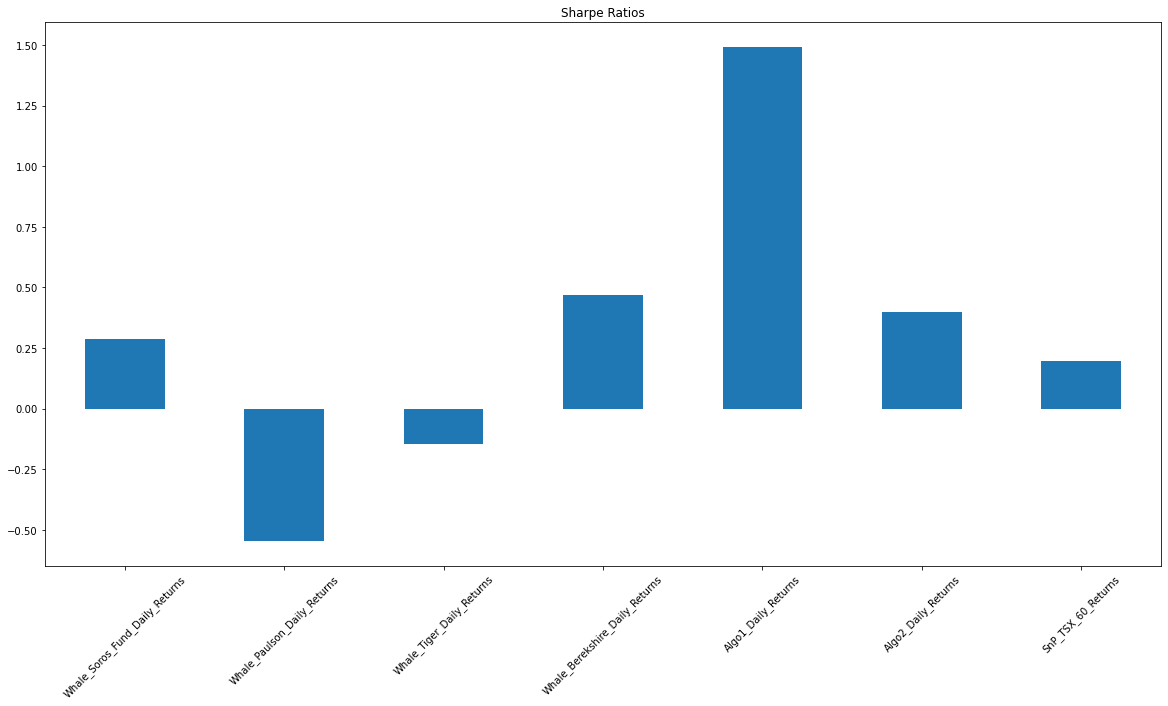

In [211]:
# Visualize the sharpe ratios as a bar plot
# Plot sharpe ratios
sharpe_ratios.plot(figsize=(20, 10), rot=45, kind="bar", title="Sharpe Ratios")

### 2. Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.





As discussed earlier, looking purly at return, Algo 1 has the highest cumulative returns, and Algo suite higher than Whale. Though higher rturns often come with higher risks, Algo1 was also the least risky portfolio compared to market. Even with ewm applid, more recent trends indicate mean return toward positive and lower volatility. 

However, the Sharp Ratio is the final masure of a successful investment, being the overall measure of risk vs return. The ratio is calculated by dividing annualised (taking into consideration annual trading days to provide an annual measure )average returns by annualised standard deviation.

The idea is to find a high rturn and low risk portfolio. Indications ar that Algo 1 is the winnere, but Sharpe Ratio confirms it. As shown in the chart above, Algo 1 has a far higher Sharpe Ratio (1.491514), compared with the market (0.195550), and the lowest overall performing portfolio, Paulson (-0.547594).
Berkshire is a distant second at 0.467045. 

Here, we are assuming that the market is the risk free rate, though in reality goverenment bonds may be more appropriate. 




---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [212]:
merged_daily_returns_df.head(1)

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                       -0.001266                    -0.004981   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                  -0.000496                       -0.006569   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03            -0.001942            -0.000949           -0.008530

## A. Get Daily Returns for Shopify Stocks 

### 1. Read in csv shopify data

In [213]:
# Reading data from 1st stock - shopify
df_shop = pd.read_csv('Resources/Shopify.csv')

### 2. Inspect data

In [214]:
df_shop.shape

(992, 6)

In [215]:
df_shop.head(3)

Date      Open      High       Low     Close    Volume
0  5/21/2015 16:00:00 28.000000 28.740000 24.110000 25.680000  12303919
1  5/22/2015 16:00:00 26.170000 31.100000 26.000000 28.310000   2842581
2  5/26/2015 16:00:00 29.800000 30.340000 29.080000 29.650000    819883

In [216]:
df_shop.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [217]:
df_shop.count()

Date      992
Open      992
High      992
Low       992
Close     992
Volume    992
dtype: int64

### 3. Convert date to index

In [218]:
df_shop['Date']= pd.to_datetime(df_shop['Date']).dt.strftime('%Y-%m-%d')

In [219]:
df_shop.head(3)

Date      Open      High       Low     Close    Volume
0  2015-05-21 28.000000 28.740000 24.110000 25.680000  12303919
1  2015-05-22 26.170000 31.100000 26.000000 28.310000   2842581
2  2015-05-26 29.800000 30.340000 29.080000 29.650000    819883

In [220]:
# set date as index
df_shop.set_index('Date', inplace=True)

In [221]:
df_shop.head(3)

Open      High       Low     Close    Volume
Date                                                        
2015-05-21 28.000000 28.740000 24.110000 25.680000  12303919
2015-05-22 26.170000 31.100000 26.000000 28.310000   2842581
2015-05-26 29.800000 30.340000 29.080000 29.650000    819883

### 4. Remove unwanted columns

In [222]:
df_shop.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [223]:
df_shop = df_shop[['Close']]

### 5. Sort date index ascending just in case

In [224]:
df_shop.sort_index(inplace=True) # probably not necssary but just in case

### 6. Get daily returns & remove closing cost

In [225]:
df_shop['Shop_Daily_Returns'] = df_shop['Close'].pct_change()

In [226]:
df_shop = df_shop[['Shop_Daily_Returns']]

### 7. Review and drop  nulls

In [227]:
df_shop.isna().sum() # first row would be null

Shop_Daily_Returns    1
dtype: int64

In [228]:
df_shop.dropna(inplace=True)

In [229]:
df_shop.isna().sum() #null should be gone

Shop_Daily_Returns    0
dtype: int64

## B. Get Daily Returns For Open Text Stocks 

### 1. Read in csv for Open Text

In [230]:
# Reading data from 2nd stock - Otex
df_otex = pd.read_csv('Resources/Otex.csv')

### 2. Inspect dataframe

In [232]:
df_otex.head(3)

Date      Open      High       Low     Close  Volume
0  1/2/2015 16:00:00 29.250000 29.440000 28.810000 29.060000  119600
1  1/5/2015 16:00:00 28.940000 28.980000 28.430000 28.580000  205832
2  1/6/2015 16:00:00 28.510000 28.560000 27.590000 27.670000  270911

In [233]:
df_otex.tail(3)

Date      Open      High       Low     Close  Volume
1085  4/26/2019 16:00:00 38.330000 38.430000 37.930000 38.420000  260862
1086  4/29/2019 16:00:00 38.420000 38.430000 38.020000 38.270000  548464
1087  4/30/2019 16:00:00 38.390000 38.640000 38.140000 38.450000  737996

In [234]:
df_otex.shape

(1088, 6)

In [235]:
df_otex.count()

Date      1088
Open      1088
High      1088
Low       1088
Close     1088
Volume    1088
dtype: int64

### 3. Convert date to index

In [236]:
df_otex['Date']= pd.to_datetime(df_otex['Date']).dt.strftime('%Y-%m-%d')

In [237]:
# set date as index
df_otex.set_index('Date', inplace=True)

In [238]:
### 4. Remove unwanted columns -declutter

In [239]:
df_otex = df_otex[['Close']]

In [240]:
### 5. Sort date index ascending just in case

In [241]:
df_otex.sort_index(inplace=True) # probably not necssary but just in case

In [242]:
### 6. Get daily returns & remove closing cost

In [243]:
df_otex['Otex_Daily_Returns'] = df_otex['Close'].pct_change()

<ipython-input-243-17af6833a064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otex['Otex_Daily_Returns'] = df_otex['Close'].pct_change()


In [244]:
df_otex = df_otex[['Otex_Daily_Returns']]

In [245]:
### 7. Review and drop nulls

In [246]:
df_otex.isna().sum() # first row would be null

Otex_Daily_Returns    1
dtype: int64

In [247]:
df_otex.dropna(inplace=True)

## C. Get Returns for Loblaw Stocks

### 1. Read in csv for Loblaw

In [248]:
# Reading data from 3rd stock - Loblaw
df_lob = pd.read_csv('Resources/TSE_L.csv')

### 2. Inspect dataframe

In [249]:
df_lob.head(3)

Date      Open      High       Low     Close  Volume
0  1/2/2015 16:00:00 52.600000 53.430000 52.510000 52.980000  250080
1  1/5/2015 16:00:00 52.640000 53.260000 51.490000 51.870000  355254
2  1/6/2015 16:00:00 51.860000 51.860000 50.240000 50.830000  379496

In [250]:
df_lob.tail(3)

Date      Open      High       Low     Close  Volume
1077  4/26/2019 16:00:00 65.340000 65.440000 64.850000 65.120000  361877
1078  4/29/2019 16:00:00 65.150000 65.600000 64.860000 65.310000  284132
1079  4/30/2019 16:00:00 65.220000 65.670000 64.780000 65.630000  441614

In [251]:
df_lob.shape

(1080, 6)

In [252]:
df_lob.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### 3. Convert date to index

In [253]:
df_lob['Date']= pd.to_datetime(df_lob['Date']).dt.strftime('%Y-%m-%d')

In [254]:
# set date as index
df_lob.set_index('Date', inplace=True)

In [255]:
### 4. Remove unwanted columns -declutter

In [256]:
df_lob = df_lob[['Close']]

In [257]:
### 5. Sort date index ascending just in case

In [258]:
df_lob.sort_index(inplace=True) # probably not necssary but just in case

In [259]:
### 6. Get daily returns & remove closing cost

In [260]:
df_lob['Loblaw_Daily_Returns'] = df_lob['Close'].pct_change()

In [261]:
df_lob = df_lob[['Loblaw_Daily_Returns']]

### 7. Review and drop nulls

In [262]:
df_lob.isna().sum() # first row would be null

Loblaw_Daily_Returns    1
dtype: int64

In [263]:
df_lob.dropna(inplace = True)

### 8. Have a final look at the data - plot and describe

In [264]:
df_lob.describe()

Loblaw_Daily_Returns
count           1079.000000
mean               0.000246
std                0.009749
min               -0.054790
25%               -0.005123
50%                0.000000
75%                0.005670
max                0.047793

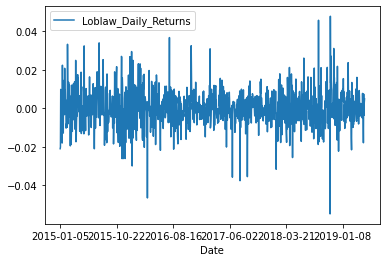

In [265]:
df_lob.plot() # have a quick look that it is centred around zero

## D. Concat New Stock Daily Returns into Single Dataframe

### 1. Perform inner concat to ensure dates line up

In [266]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Date`)
merged_analysis_newstock_df_tmp = pd.concat([df_lob, df_otex], axis="columns", join="inner")

In [267]:
merged_newstock_daily_returns_df = pd.concat([merged_analysis_newstock_df_tmp, df_shop], axis="columns", join="inner")

### 2. Inspect data in newly merged 

In [268]:
merged_newstock_daily_returns_df.head(5)

Loblaw_Daily_Returns  Otex_Daily_Returns  Shop_Daily_Returns
Date                                                                    
2015-05-22             -0.000742            0.013660            0.102414
2015-05-26              0.001108           -0.006506            0.047333
2015-05-27              0.006458           -0.007484           -0.072513
2015-05-28             -0.006049            0.002356           -0.001818
2015-05-29             -0.013833           -0.002351           -0.009107

In [269]:
merged_newstock_daily_returns_df.tail(5)

Loblaw_Daily_Returns  Otex_Daily_Returns  Shop_Daily_Returns
Date                                                                    
2019-04-24             -0.017863            0.000525           -0.016246
2019-04-25              0.007398            0.005506           -0.003821
2019-04-26             -0.003672            0.001825            0.015116
2019-04-29              0.002918           -0.003904            0.015791
2019-04-30              0.004900            0.004703            0.078569

In [270]:
merged_newstock_daily_returns_df.shape

(966, 3)

In [271]:
merged_newstock_daily_returns_df.dtypes

Loblaw_Daily_Returns    float64
Otex_Daily_Returns      float64
Shop_Daily_Returns      float64
dtype: object

In [272]:
merged_newstock_daily_returns_df.index.dtype # check the data type of the index

dtype('O')

In [273]:
merged_newstock_daily_returns_df.isna().sum() # no nulls found, already removed in last step

Loblaw_Daily_Returns    0
Otex_Daily_Returns      0
Shop_Daily_Returns      0
dtype: int64

In [274]:
### 3. Plot Merged Daily Returns Data

Text(0, 0.5, 'Date')

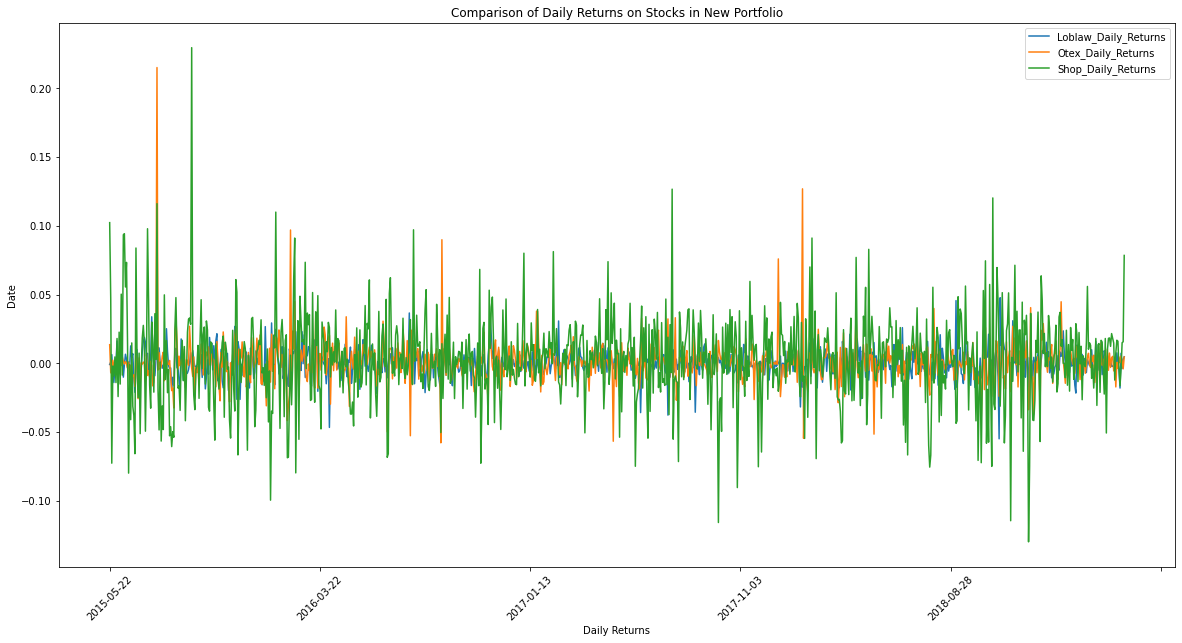

In [275]:
drp = merged_newstock_daily_returns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Returns on Stocks in New Portfolio')
drp.set_xlabel("Daily Returns")
drp.set_ylabel("Date")


## E. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

### 1. Portfolio returns. - Set even weights across the 3 new portfolios

In [276]:
# Set weights
weights = [1/3, 1/3, 1/3]



### 2. Calculate portfolio return

In [277]:
# use the dot function to cross multiple the daily rturns of individual stocks against the weights
portfolio_newstock_daily_returns_df = merged_newstock_daily_returns_df.dot(weights)


In [278]:
portfolio_newstock_daily_returns_df.shape

(966,)

In [279]:
portfolio_newstock_daily_returns_df.head()

Date
2015-05-22    0.038444
2015-05-26    0.013979
2015-05-27   -0.024513
2015-05-28   -0.001837
2015-05-29   -0.008430
dtype: float64

### 3. Plot Portfolio Returns

Text(0, 0.5, 'Date')

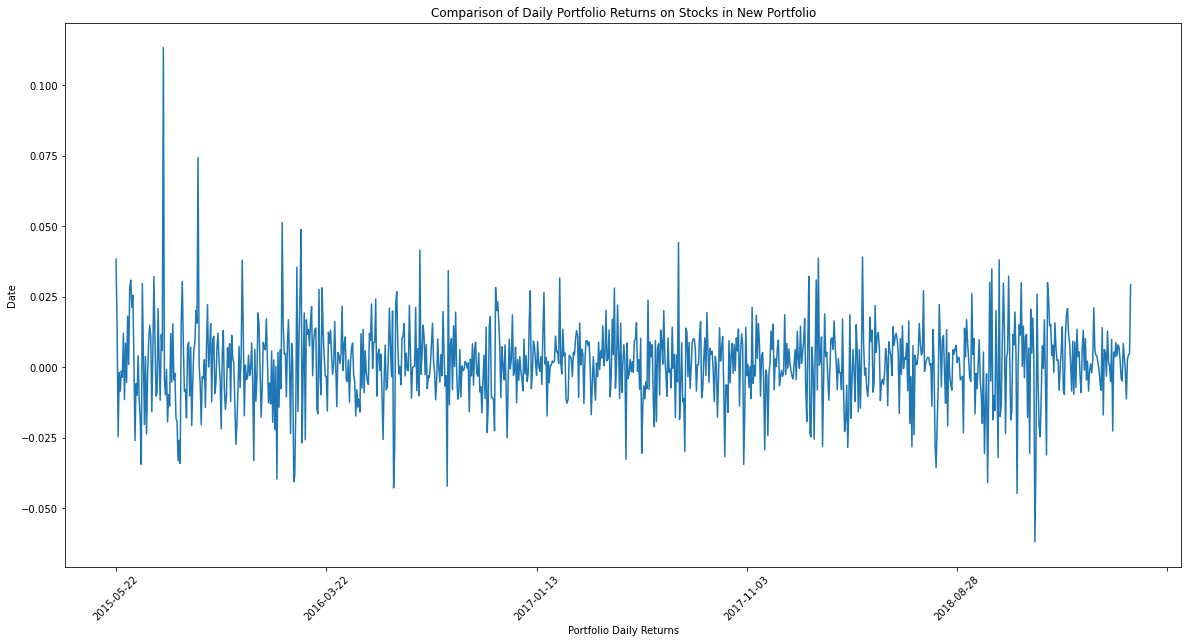

In [280]:
drp = portfolio_newstock_daily_returns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Portfolio Returns on Stocks in New Portfolio')
drp.set_xlabel("Portfolio Daily Returns")
drp.set_ylabel("Date")



## F. Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [281]:
# Join your returns DataFrame to the original returns DataFrame

merged_orig_vs_new_returns = pd.concat([merged_daily_returns_df, portfolio_newstock_daily_returns_df], axis="columns", join="inner")

In [282]:
len(merged_orig_vs_new_returns) # there are 966 overlappting dates after inner join

966

In [283]:
merged_orig_vs_new_returns.head()

Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-05-22                        0.000542                     0.000292   
2015-05-26                       -0.008718                     0.000968   
2015-05-27                        0.005536                     0.003383   
2015-05-28                       -0.001599                     0.000619   
2015-05-29                       -0.001533                     0.000059   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-05-22                   0.000734                        0.005268   
2015-05-26                  -0.007167                       -0.003362   
2015-05-27                   0.005831                        0.003505   
2015-05-28                  -0.001491                       -0.008909   
2015-05-29                  -0.004973                       -0.005498   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  \
Date                                                                       
2015-05-22            -0.007780            -0.003892           -0.000187   
2015-05-26            -0.004471            -0.009913           -0.008994   
2015-05-27             0.000935             0.010525            0.003964   
2015-05-28             0.003087             0.001252           -0.000230   
2015-05-29            -0.001715            -0.005320           -0.006150   

                   0  
Date                  
2015-05-22  0.038444  
2015-05-26  0.013979  
2015-05-27 -0.024513  
2015-05-28 -0.001837  
2015-05-29 -0.008430

In [284]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


Text(0, 0.5, 'Date')

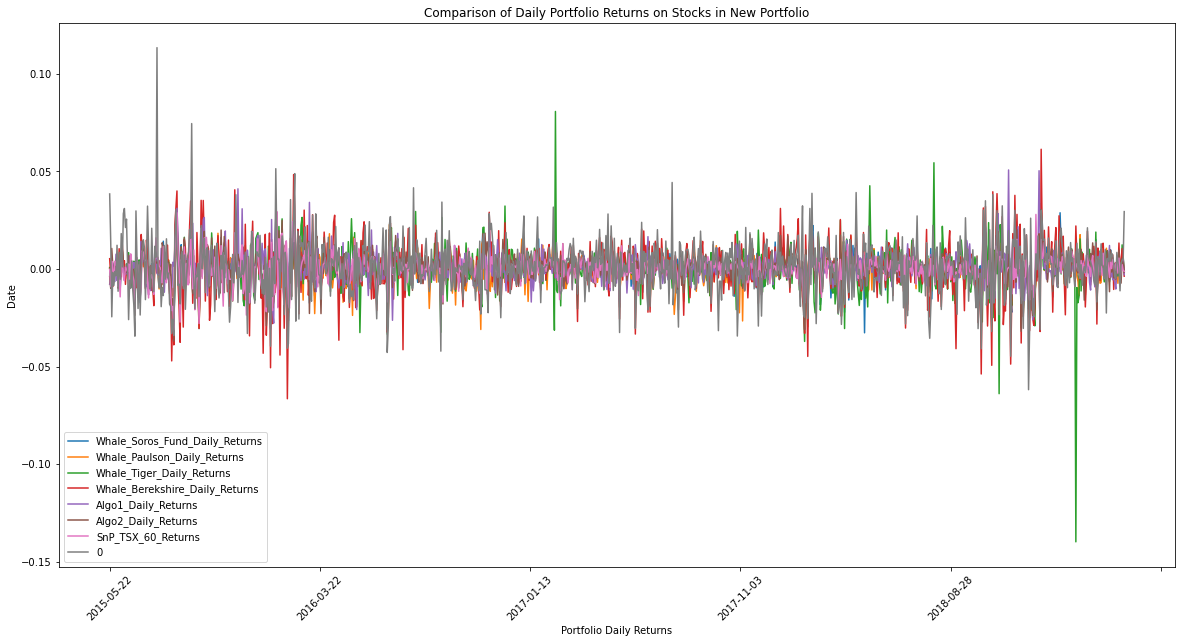

In [285]:
drp = merged_orig_vs_new_returns.plot(figsize=(20,10), rot=45, title='Comparison of Daily Portfolio Returns on Stocks in New Portfolio')
drp.set_xlabel("Portfolio Daily Returns")
drp.set_ylabel("Date")

## G. Re-run the risk analysis with your portfolio to see how it compares to the others

### 1. Calculate the Annualized Standard Deviation

In [286]:
# Daily standard deviation of new and old daily returns sorted in ascending ordeer
daily_std_new_old = merged_orig_vs_new_returns.std()
daily_std_new_old.sort_values()

Whale_Paulson_Daily_Returns      0.007093
SnP_TSX_60_Returns               0.007112
Algo1_Daily_Returns              0.007690
Whale_Soros_Fund_Daily_Returns   0.007975
Algo2_Daily_Returns              0.008467
Whale_Tiger_Daily_Returns        0.011146
Whale_Berekshire_Daily_Returns   0.013111
0                                0.014146
dtype: float64

Text(0, 0.5, 'Portfolio')

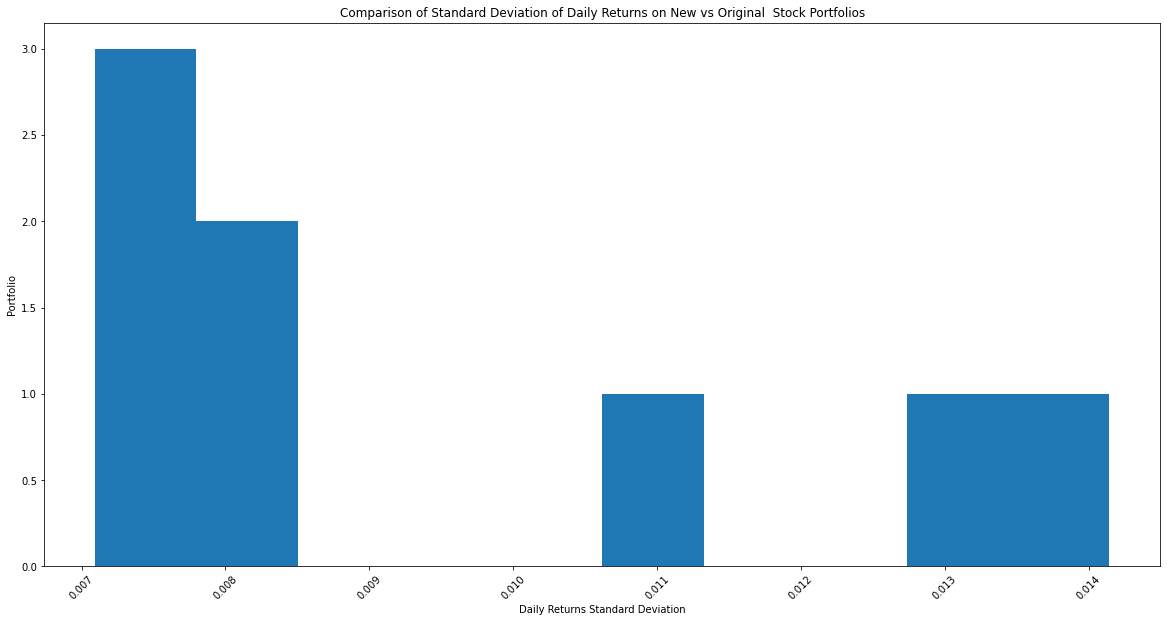

In [287]:
nomcrb = daily_std_new_old.plot.hist(figsize=(20,10), rot=45, title='Comparison of Standard Deviation of Daily Returns on New vs Original  Stock Portfolios')
nomcrb.set_xlabel("Daily Returns Standard Deviation")
nomcrb.set_ylabel("Portfolio")

In [288]:
# Calculate the annualised `std`
# Calculate the annualised standard deviation (252 trading days)
annualized_new_old_std = daily_std_new_old * np.sqrt(252)
annualized_new_old_std.sort_values()

Whale_Paulson_Daily_Returns      0.112594
SnP_TSX_60_Returns               0.112906
Algo1_Daily_Returns              0.122070
Whale_Soros_Fund_Daily_Returns   0.126604
Algo2_Daily_Returns              0.134409
Whale_Tiger_Daily_Returns        0.176941
Whale_Berekshire_Daily_Returns   0.208131
0                                0.224554
dtype: float64

AttributeError: 'Rectangle' object has no property 'rot'

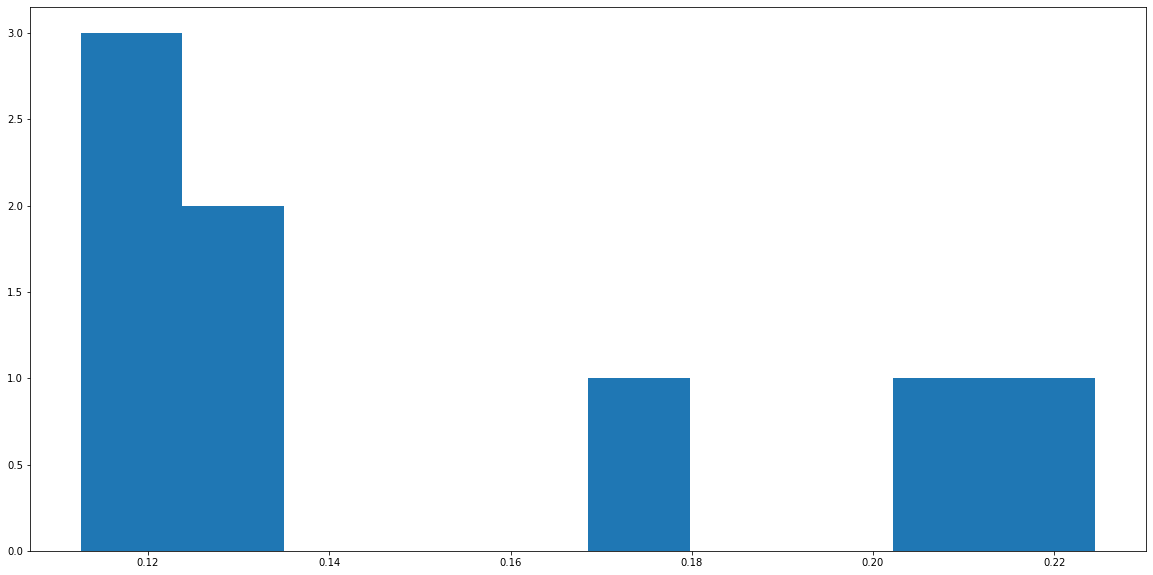

In [289]:
# plot annualised standard deviation old vs new


nomcrb = annualized_new_old_std.hist(figsize=(20,10), rot=45, title='Comparison of Annualised Standard Deviation of Daily Returns on New vs Original  Stock Portfolios')



### 2.  Calculate and plot rolling `std` with 21-day window

In [290]:
# Calculate rolling standard deviation

# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll21_old_new_std = merged_daily_returns_df.rolling(window=21).std()

roll21_old_new_std





Whale_Soros_Fund_Daily_Returns  Whale_Paulson_Daily_Returns  \
Date                                                                      
2015-03-03                             nan                          nan   
2015-03-04                             nan                          nan   
2015-03-05                             nan                          nan   
2015-03-06                             nan                          nan   
2015-03-09                             nan                          nan   
...                                    ...                          ...   
2019-04-25                        0.004145                     0.005572   
2019-04-26                        0.004117                     0.005649   
2019-04-29                        0.004123                     0.005374   
2019-04-30                        0.004199                     0.005408   
2019-05-01                        0.004271                     0.005009   

            Whale_Tiger_Daily_Returns  Whale_Berekshire_Daily_Returns  \
Date                                                                    
2015-03-03                        nan                             nan   
2015-03-04                        nan                             nan   
2015-03-05                        nan                             nan   
2015-03-06                        nan                             nan   
2015-03-09                        nan                             nan   
...                               ...                             ...   
2019-04-25                   0.004917                        0.006641   
2019-04-26                   0.005424                        0.006599   
2019-04-29                   0.005438                        0.006584   
2019-04-30                   0.005419                        0.006323   
2019-05-01                   0.005744                        0.006143   

            Algo1_Daily_Returns  Algo2_Daily_Returns  SnP_TSX_60_Returns  
Date                                                                      
2015-03-03                  nan                  nan                 nan  
2015-03-04                  nan                  nan                 nan  
2015-03-05                  nan                  nan                 nan  
2015-03-06                  nan                  nan                 nan  
2015-03-09                  nan                  nan                 nan  
...                         ...                  ...                 ...  
2019-04-25             0.005801             0.005764            0.003370  
2019-04-26             0.005562             0.005700            0.003321  
2019-04-29             0.005251             0.005622            0.003356  
2019-04-30             0.005294             0.005600            0.003240  
2019-05-01             0.004972             0.005686            0.003150  

[1029 rows x 7 columns]

Text(0, 0.5, 'Standard Deviation')

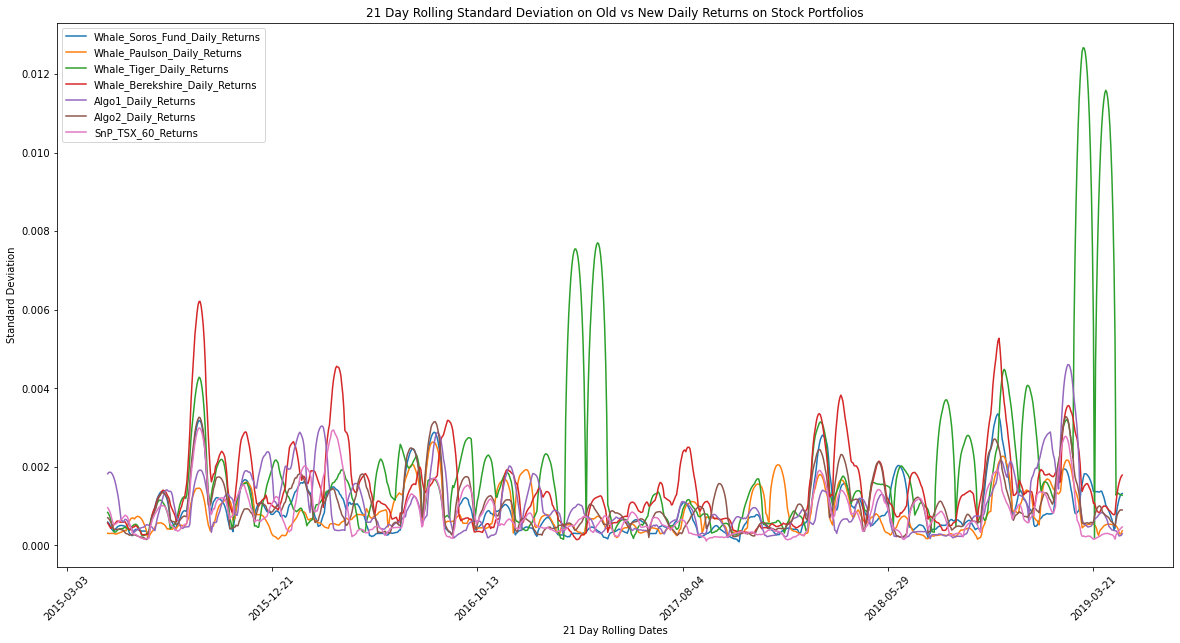

In [291]:

# Plot the rolling standard deviation on all daily return (not closing price)
rollsp = roll21_old_new_std.rolling(window=21).std().plot(figsize=(20,10), rot=45, title='21 Day Rolling Standard Deviation on Old vs New Daily Returns on Stock Portfolios')
rollsp.set_xlabel("21 Day Rolling Dates")
rollsp.set_ylabel("Standard Deviation")

### 3.  Calculate and plot the correlation

In [292]:
# Calculate and plot the correlation
# Calculate the correlation between each column
correlation_oldnew = merged_orig_vs_new_returns.corr()
correlation_oldnew.sort_values(ascending=False)




TypeError: sort_values() missing 1 required positional argument: 'by'

NameError: name 'correlation_oldnewcorrelation' is not defined

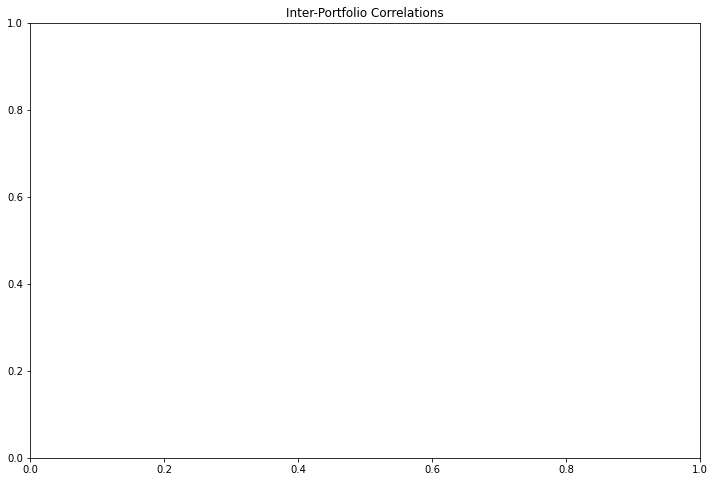

In [293]:
# Display correlation matrix

import matplotlib.pyplot as plt

fig = plt.gcf()

# Set the title
plt.title('Inter-Portfolio Correlations')

# Change seaborn plot size
fig.set_size_inches(12, 8)


sns.heatmap(correlation_oldnewcorrelation, vmin=-1, vmax=1)

### 4. Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [294]:
# Calculate and plot Beta

# Covariance of Whales against SnP TSX 60 Return
New_Stocks_Covariance = df_wr["Whale_Berekshire_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])

# Display the covariance of each whale sub-portfolio
print("Soros Covariance: ", "%.16f" % Whale_Soros_Covariance)
print("Paulson Covariance: ", "%.16f" % Whale_Paulson_Covariance)
print("Tiger Covariance: ", "%.16f" % Whale_Tiger_Covariance)
print("Berekshire Covariance: ", "%.16f" % Whale_Berekshire_Covariance)

# Covariance of Whales against SnP TSX 60 Returns
Algo1_Covariance = df_ar["Algo1_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])
Algo2_Covariance = df_ar["Algo2_Daily_Returns"].cov(df_sr["SnP_TSX_60_Returns"])

# Display the covariance of each whale sub-portfolio
print("Algo1 Covariance: ", "%.16f" % Algo1_Covariance)
print("Algo2 Covariance: ", "%.16f" % Algo2_Covariance
      
      
# covariance of algos portfolio (within the portfolio)
covariance_algo = df_ar.cov()
covariance_algo
      
# covariance of s&p 60 TSR portfolio
covariance_snp = df_sr.cov()
covariance_snp
      
      
      # Calculate covariance of a single sub-portfolio streams in portfolios
# how each individual sub-portfolios covary with other sub-portfolios
# similar evaluation to correlation heat map
covariance_a = merged_daily_returns_df.cov()
covariance_a
      
      
# Calculate variance of S&P TSX
variance_snp = df_sr.var()
variance_snp
      
# Beta Values for Whales Sub-Portfolios
# Calculate beta of all daily returns of whale portfolio
Soros_beta = Whale_Soros_Covariance / variance_snp
Paulson_beta = Whale_Paulson_Covariance / variance_snp
Tiger_beta = Whale_Tiger_Covariance / variance_snp
Berekshire_beta = Whale_Berekshire_Covariance / variance_snp


# Display the covariance of each Whale sub-portfolio
print("Soros Beta: ", "%.16f" % Soros_beta)
print("Paulson Beta: ", "%.16f" % Paulson_beta)
print("Tiger Beta: ", "%.16f" % Tiger_beta)
print("Berekshire Beta: ", "%.16f" % Berekshire_beta)
print("--------------------")

Average_Whale_beta = (Soros_beta  + Paulson_beta + Tiger_beta +  Berekshire_beta)/4
print("Average Whale Beta: ", "%.16f" % Average_Whale_beta)
      
# Beta Values for Algos Sub-Portfolios
# Calculate beta of all daily returns of Algos portfolio
Algo1_beta = Algo1_Covariance / variance_snp
Algo2_beta = Algo2_Covariance / variance_snp


# Display the covariance of each Algos sub-portfolio
print("Algo1 Beta: ", "%.16f" % Algo1_beta)
print("Algo2 Beta: ", "%.16f" % Algo2_beta)

print("--------------------")

Average_Algo_beta = (Algo1_beta  + Algo2_beta)/2
print("Average Algo Beta: ", "%.16f" % Average_Algo_beta)
      
      
      
      
      
# 21 day rolling covariance of algo portfolio stocks vs. S&P TSX 60
rolling_algo1_covariance = merged_daily_returns_df["Algo1_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_algo2_covariance = merged_daily_returns_df["Algo2_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])

# 21 day rolling covariance of whale portfolio stocks vs. S&P TSX 60
rolling_Soros_covariance = merged_daily_returns_df["Whale_Soros_Fund_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Paulson_covariance =  merged_daily_returns_df["Whale_Paulson_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Tiger_covariance = merged_daily_returns_df["Whale_Tiger_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])
rolling_Berkshire_covariance = merged_daily_returns_df["Whale_Berekshire_Daily_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])

# 21 day rolling S&P TSX 60 covariance
rolling_SnP_covariance = merged_daily_returns_df["SnP_TSX_60_Returns"].rolling(window=21,  min_periods=1).cov(df_sr["SnP_TSX_60_Returns"])


# 21 day rolling variance of S&P TSX 60
rolling_variance = merged_daily_returns_df["SnP_TSX_60_Returns"].rolling(window=21).var()

# 21 day rolling beta of algo portfolio stocks vs. S&P TSX 60
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_algo2_beta = rolling_algo2_covariance / rolling_variance

# 21 day average beta for algo portfolio
rolling_average_algo_beta = (rolling_algo1_beta + rolling_algo1_beta)/2

# 21 day rolling beta of whale portfolio stocks vs. S&P TSX 60
rolling_Soros_beta = rolling_Soros_covariance / rolling_variance
rolling_Paulson_beta = rolling_Paulson_covariance / rolling_variance
rolling_Tiger_beta = rolling_Tiger_covariance / rolling_variance
rolling_Berkshire_beta = rolling_Berkshire_covariance / rolling_variance
rolling_SnP_Beta = rolling_SnP_covariance/ rolling_variance

# 21 day average beta for whale portfolio
rolling_average_whale_beta = (rolling_Soros_beta + rolling_Paulson_beta + rolling_Tiger_beta + rolling_Berkshire_beta)/4


# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = rolling_algo1_covariance.plot(figsize=(20, 10), title="Rolling 21 Day Covariance of Sub-Portfolio Returns vs. S&P TSX 60 Returns")
rolling_algo2_covariance.plot(ax=ax)
rolling_Soros_covariance.plot(ax=ax)
rolling_Paulson_covariance.plot(ax=ax)
rolling_Tiger_covariance.plot(ax=ax)
rolling_Berkshire_covariance.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1 Covariance", "Algo2 Covariance", "Whale Soros Covariance", "Whale Paulson Covariance", "Whale Tiger Covariance","Whale Berkshire Covariance"])

SyntaxError: invalid syntax (<ipython-input-294-d9ec63c857e2>, line 22)

### 5. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [295]:
# Calculate Annualised Sharpe Ratios
# Annualised Sharpe Ratios
sharpe_ratios_old_new = (merged_daily_returns_df.mean() * 252) / (merged_daily_returns_df.std() * np.sqrt(252))




In [296]:
sharpe_ratios_old_new.sort_values(ascending=False)

Algo1_Daily_Returns               1.491514
Whale_Berekshire_Daily_Returns    0.467045
Algo2_Daily_Returns               0.396817
Whale_Soros_Fund_Daily_Returns    0.286709
SnP_TSX_60_Returns                0.195550
Whale_Tiger_Daily_Returns        -0.144455
Whale_Paulson_Daily_Returns      -0.547594
dtype: float64

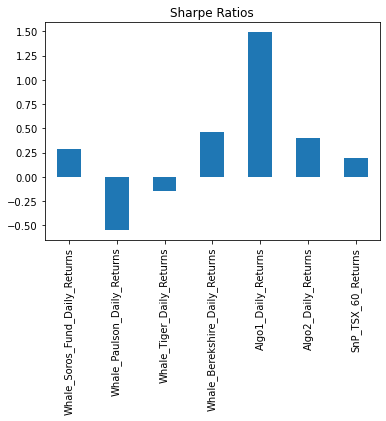

In [297]:
# Visualise the sharpe ratios as a bar plot

# Plot sharpe ratios
sharpe_ratios_old_new.plot(kind="bar", title="Sharpe Ratios")

### 6. How does your portfolio do?



However, the individual risk appetite of the individual needs to be taken into consideration. For relatively low risk and reasonable returns, a market index such as the S&P is a good options. 
For others who have more liquid cash to gamble, might simple ignore risk and go for short term highest rewards. 

However, overall it is possible to look at the best stock as one that offer the best return for the lowest risk. This is what the sharpe ratio uncovers. For that reason, of all the portfolios, the best investment would be 

More data would be needed to see to what extent the intrenal portfolio stock eg Algo 1, correlate with one another. Highly correlated stocks move togeether, and the net effect is an amplification of gains and losses. From a risk mitigation perspective, highly correlated stock portfolios can be diversified with those that have none or negative correlation. 

## References

Shift function in pandas - 
https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe

Conditional line color -  
https://stackoverflow.com/questions/31590184/plot-multicolored-line-based-on-conditional-in-python

https://stackoverflow.com/questions/40803570/python-matplotlib-scatter-plot-specify-color-points-depending-on-conditions/40804861

https://stackoverflow.com/questions/42453649/conditional-color-with-matplotlib-scatter

https://stackoverflow.com/questions/3832809/how-to-change-the-color-of-a-single-bar-if-condition-is-true-matplotlib

https://stackoverflow.com/questions/56779975/conditional-coloring-in-matplotlib-using-numpys-where

Google finance - https://support.google.com/docs/answer/3093281?hl=en

Boxplots - https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

EWM - https://www.youtube.com/watch?v=lAq96T8FkTw

PEP 8 - Standards - https://www.python.org/dev/peps/pep-0008/

